In [ ]:
import pandas as pd

# Read data
data = pd.read_csv('QVI_data.csv')

print(data.tail())

        LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
264829         2370701  2018-12-08         88  240378        24   
264830         2370751  2018-10-01         88  240394        60   
264831         2370961  2018-10-24         88  240480        70   
264832         2370961  2018-10-27         88  240481        65   
264833         2373711  2018-12-14         88  241815        16   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
264829     Grain Waves         Sweet Chilli 210g         2        7.2   
264830      Kettle Tortilla ChpsFeta&Garlic 150g         2        9.2   
264831   Tyrrells Crisps     Lightly Salted 165g         2        8.4   
264832  Old El Paso Salsa   Dip Chnky Tom Ht300g         2       10.2   
264833  Smiths Crinkle Chips Salt & Vinegar 330g         2       11.4   

        PACK_SIZE     BRAND              LIFESTAGE PREMIUM_CUSTOMER  
264829        210   GRNWVES         YOUNG FAMILIES       Mainstream  
264830        150 

In [ ]:
print("## Descriptive Statistics ##")
print(data.describe())

## Descriptive Statistics ##
       LYLTY_CARD_NBR      STORE_NBR        TXN_ID       PROD_NBR  \
count    2.648340e+05  264834.000000  2.648340e+05  264834.000000   
mean     1.355488e+05     135.079423  1.351576e+05      56.583554   
std      8.057990e+04      76.784063  7.813292e+04      32.826444   
min      1.000000e+03       1.000000  1.000000e+00       1.000000   
25%      7.002100e+04      70.000000  6.760050e+04      28.000000   
50%      1.303570e+05     130.000000  1.351365e+05      56.000000   
75%      2.030940e+05     203.000000  2.026998e+05      85.000000   
max      2.373711e+06     272.000000  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES      PACK_SIZE  
count  264834.000000  264834.000000  264834.000000  
mean        1.905813       7.299346     182.425512  
std         0.343436       2.527241      64.325148  
min         1.000000       1.500000      70.000000  
25%         2.000000       5.400000     150.000000  
50%         2.000000       7.40

In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])

# Create the 'MONTH_ID' column by formatting the 'DATE' column to 'YYYYMM'
data['MONTH_ID'] = data['DATE'].dt.strftime('%Y%m')

# Display the original 'DATE' and the new 'MONTH_ID' for the first 5 rows to confirm
print("## DataFrame with new MONTH_ID column ##")
print(data[['DATE', 'MONTH_ID']].head())

## DataFrame with new MONTH_ID column ##
        DATE MONTH_ID
0 2018-10-17   201810
1 2018-09-16   201809
2 2019-03-07   201903
3 2019-03-08   201903
4 2018-11-02   201811


In [ ]:
data.shape

(264834, 13)

In [ ]:
# Group by store and month to calculate metrics
store_month_data = data.groupby(['STORE_NBR', 'MONTH_ID']).agg(
    Total_Sales=('TOT_SALES', 'sum'),
    Number_of_Customers=('LYLTY_CARD_NBR', 'nunique'),
    Number_of_Transactions=('TXN_ID', 'count'),
    Total_Chips_Sold=('PROD_QTY', 'sum')
).reset_index()

# Calculate additional metrics
store_month_data['Transactions_per_Customer'] = store_month_data['Number_of_Transactions'] / store_month_data['Number_of_Customers']
store_month_data['Chips_per_Customer'] = store_month_data['Total_Chips_Sold'] / store_month_data['Number_of_Customers']
store_month_data['Average_Price_per_Unit'] = store_month_data['Total_Sales'] / store_month_data['Total_Chips_Sold']

# Display the resulting dataframe
print("## Store and Month Level Metrics ##")
display(store_month_data.head())
print(store_month_data.shape)

## Store and Month Level Metrics ##


,STORE_NBR,MONTH_ID,Total_Sales,Number_of_Customers,Number_of_Transactions,Total_Chips_Sold,Transactions_per_Customer,Chips_per_Customer,Average_Price_per_Unit
0,1,201807,206.9,49,52,62,1.061224,1.265306,3.337097
1,1,201808,176.1,42,43,54,1.023810,1.285714,3.261111
2,1,201809,278.8,59,62,75,1.050847,1.271186,3.717333
3,1,201810,188.1,44,45,58,1.022727,1.318182,3.243103
4,1,201811,192.6,46,47,57,1.021739,1.239130,3.378947


(3169, 9)


In [ ]:
# Find stores with 12 months of observations
stores_with_full_obs = store_month_data.groupby('STORE_NBR').filter(lambda x: len(x) == 12)['STORE_NBR'].unique()

# Filter for data before 201902 and for stores with full observations
pre_trial_measures = store_month_data[(store_month_data['MONTH_ID'] < '201902') &
                                      (store_month_data['STORE_NBR'].isin(stores_with_full_obs))]

# Display the resulting dataframe
print("## Pre-Trial Measures (Stores with Full Observations before 201902) ##")
display(pre_trial_measures.head())
print(pre_trial_measures.shape)

## Pre-Trial Measures (Stores with Full Observations before 201902) ##


,STORE_NBR,MONTH_ID,Total_Sales,Number_of_Customers,Number_of_Transactions,Total_Chips_Sold,Transactions_per_Customer,Chips_per_Customer,Average_Price_per_Unit
0,1,201807,206.9,49,52,62,1.061224,1.265306,3.337097
1,1,201808,176.1,42,43,54,1.023810,1.285714,3.261111
2,1,201809,278.8,59,62,75,1.050847,1.271186,3.717333
3,1,201810,188.1,44,45,58,1.022727,1.318182,3.243103
4,1,201811,192.6,46,47,57,1.021739,1.239130,3.378947


(1820, 9)


In [ ]:
# Get the number of unique store numbers in the data DataFrame
num_unique_stores = data['STORE_NBR'].nunique()

print(f"The number of unique stores in the dataset is: {num_unique_stores}")

The number of unique stores in the dataset is: 272


In [ ]:
import pandas as pd

def calculate_correlation(input_table, metric_col, store_comparison):
    """
    Calculates the correlation of a metric between a trial store and other stores.

    Args:
        input_table (pd.DataFrame): A DataFrame containing the metric data.
        metric_col (str): The name of the column containing the metric to correlate.
        store_comparison (int): The store number of the trial store.

    Returns:
        pd.DataFrame: A DataFrame with the correlation between the trial store and other stores.
    """
    calc_corr_table = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    store_numbers = input_table['STORE_NBR'].unique()

    for store_num in store_numbers:
        if store_num != store_comparison:
            # Get the metric data for the trial store and the current store
            trial_store_data = input_table[input_table['STORE_NBR'] == store_comparison][metric_col].reset_index(drop=True)
            current_store_data = input_table[input_table['STORE_NBR'] == store_num][metric_col].reset_index(drop=True)
              # Ensure both series have the same length before calculating correlation
            #if len(trial_store_data) == len(current_store_data) and len(trial_store_data) > 1:
                # Calculate the correlation
            correlation = trial_store_data.corr(current_store_data)
            # Create a DataFrame for the calculated measure
            calculated_measure = pd.DataFrame({
                "Store1": [store_comparison],
                "Store2": [store_num],
                "corr_measure": [correlation]
            })

            # Append to the results table
            calc_corr_table = pd.concat([calc_corr_table, calculated_measure], ignore_index=True)
            #else:
             #   print(f"Skipping correlation calculation for store {store_num} due to unequal or insufficient data points.")
    return calc_corr_table

# Example usage (assuming pre_trial_measures is your input_table and 77 is your trial store)
# correlation_results = calculate_correlation(pre_trial_measures, 'Total_Sales', 77)
# display(correlation_results.head())

In [ ]:
import pandas as pd
import numpy as np

def calculate_magnitude_distance(input_table, metric_col, store_comparison):
    """
    Calculates the standardized magnitude distance of a metric between a trial store and other stores.

    Args:
        input_table (pd.DataFrame): A DataFrame containing the metric data.
        metric_col (str): The name of the column containing the metric to calculate distance on.
        store_comparison (int): The store number of the trial store.

    Returns:
        pd.DataFrame: A DataFrame with the standardized magnitude distance between the trial store and other stores.
    """
    calc_dist_table = pd.DataFrame(columns=['Store1', 'Store2', 'MONTH_ID', 'measure'])
    store_numbers = input_table['STORE_NBR'].unique()

    for store_num in store_numbers:
        if store_num != store_comparison:
            # Get the metric data for the trial store and the current store
            trial_store_data = input_table[input_table['STORE_NBR'] == store_comparison][['MONTH_ID', metric_col]].reset_index(drop=True)
            current_store_data = input_table[input_table['STORE_NBR'] == store_num][['MONTH_ID', metric_col]].reset_index(drop=True)

            # Merge the data on MONTH_ID to ensure alignment
            merged_data = pd.merge(trial_store_data, current_store_data, on='MONTH_ID', suffixes=('_trial', '_current'))

            # Calculate the absolute difference
            calculated_measure = pd.DataFrame({
                "Store1": store_comparison,
                "Store2": store_num,
                "MONTH_ID": merged_data['MONTH_ID'],
                "measure": np.abs(merged_data[metric_col + '_trial'] - merged_data[metric_col + '_current'])
            })

            # Append to the results table
            calc_dist_table = pd.concat([calc_dist_table, calculated_measure], ignore_index=True)

    # Standardise the magnitude distance
    min_max_dist = calc_dist_table.groupby(['Store1', 'MONTH_ID'])['measure'].agg(['min', 'max']).reset_index()
    min_max_dist.columns = ['Store1', 'MONTH_ID', 'minDist', 'maxDist']

    dist_table = pd.merge(calc_dist_table, min_max_dist, on=['Store1', 'MONTH_ID'])
    # Handle the case where min and max are the same to avoid division by zero
    dist_table['magnitudeMeasure'] = 1 - (dist_table['measure'] - dist_table['minDist']) / (dist_table['maxDist'] - dist_table['minDist']).replace(0, np.nan)

    final_dist_table = dist_table.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index()
    final_dist_table.columns = ['Store1', 'Store2', 'mag_measure']

    return final_dist_table

# Example usage (assuming pre_trial_measures is your input_table and 77 is your trial store)
# magnitude_distance_results = calculate_magnitude_distance(pre_trial_measures, 'Total_Sales', 77)
# display(magnitude_distance_results.head())

# TRIAL STORE 77

In [ ]:
# Define the trial store
trial_store = 77

# Calculate correlation for 'Total_Sales' against store 77
corr_nSales = calculate_correlation(pre_trial_measures, 'Total_Sales', trial_store)
print("## Correlation of Total Sales with Store 77 ##")
display(corr_nSales.head())
# Calculate correlation for 'Number_of_Customers' against store 77
corr_nCustomers = calculate_correlation(pre_trial_measures, 'Number_of_Customers', trial_store)
print("\n## Correlation of Number of Customers with Store 77 ##")
display(corr_nCustomers.head())

# Calculate magnitude distance for 'Total_Sales' against store 77
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, 'Total_Sales', trial_store)
print("\n## Magnitude Distance of Total Sales with Store 77 ##")
display(magnitude_nSales.head())

# Calculate magnitude distance for 'Number_of_Customers' against store 77
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, 'Number_of_Customers', trial_store)
print("\n## Magnitude Distance of Number of Customers with Store 77 ##")
display(magnitude_nCustomers.head())

/tmp/ipython-input-86-3974181785.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calc_corr_table = pd.concat([calc_corr_table, calculated_measure], ignore_index=True)


## Correlation of Total Sales with Store 77 ##


,Store1,Store2,corr_measure
0,77,1,0.075218
1,77,2,-0.263079
2,77,3,0.806644
3,77,4,-0.263300
4,77,5,-0.110652


/tmp/ipython-input-86-3974181785.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calc_corr_table = pd.concat([calc_corr_table, calculated_measure], ignore_index=True)



## Correlation of Number of Customers with Store 77 ##


,Store1,Store2,corr_measure
0,77,1,0.322168
1,77,2,-0.572051
2,77,3,0.834207
3,77,4,-0.295639
4,77,5,0.370659


/tmp/ipython-input-87-1384577921.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calc_dist_table = pd.concat([calc_dist_table, calculated_measure], ignore_index=True)



## Magnitude Distance of Total Sales with Store 77 ##


,Store1,Store2,mag_measure
0,77,1,0.955061
1,77,2,0.939318
2,77,3,0.354963
3,77,4,0.177414
4,77,5,0.554066



## Magnitude Distance of Number of Customers with Store 77 ##


,Store1,Store2,mag_measure
0,77,1,0.940321
1,77,2,0.924638
2,77,3,0.345067
3,77,4,0.189579
4,77,5,0.481199


In [ ]:
# Define the weight for correlation
corr_weight = 0.5

# Merge correlation and magnitude distance for Total Sales and calculate the combined score
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = corr_weight * score_nSales['corr_measure'] + (1 - corr_weight) * score_nSales['mag_measure']

# Merge correlation and magnitude distance for Number of Customers and calculate the combined score
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = corr_weight * score_nCustomers['corr_measure'] + (1 - corr_weight) * score_nCustomers['mag_measure']

# Display the resulting dataframes
print("## Combined Score for Total Sales ##")
display(score_nSales.head())

print("\n## Combined Score for Number of Customers ##")
display(score_nCustomers.head())

## Combined Score for Total Sales ##


,Store1,Store2,corr_measure,mag_measure,scoreNSales
0,77,1,0.075218,0.955061,0.515139
1,77,2,-0.263079,0.939318,0.338120
2,77,3,0.806644,0.354963,0.580803
3,77,4,-0.263300,0.177414,-0.042943
4,77,5,-0.110652,0.554066,0.221707



## Combined Score for Number of Customers ##


,Store1,Store2,corr_measure,mag_measure,scoreNCust
0,77,1,0.322168,0.940321,0.631244
1,77,2,-0.572051,0.924638,0.176294
2,77,3,0.834207,0.345067,0.589637
3,77,4,-0.295639,0.189579,-0.05303
4,77,5,0.370659,0.481199,0.425929


In [ ]:
# Combine sales and customer scores
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'])

# Calculate the final control score
score_Control['finalControlScore'] = score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCust'] * 0.5

# Order the results in descending order of finalControlScore
score_Control = score_Control.sort_values(by='finalControlScore', ascending=False).reset_index(drop=True)

print("## Combined Control Scores ##")
display(score_Control.head())


## Combined Control Scores ##


,Store1,Store2,corr_measure_x,mag_measure_x,scoreNSales,corr_measure_y,mag_measure_y,scoreNCust,finalControlScore
0,77,233,0.903774,0.987091,0.945433,0.990358,0.992773,0.991566,0.968499
1,77,41,0.783232,0.966917,0.875075,0.844219,0.974639,0.909429,0.892252
2,77,17,0.842668,0.882314,0.862491,0.747308,0.962495,0.854902,0.858696
3,77,254,0.577108,0.924468,0.750788,0.916208,0.937131,0.92667,0.838729
4,77,115,0.689159,0.934576,0.811868,0.718882,0.965916,0.842399,0.827133


In [ ]:
# Select the store with the highest final control score
control_store = score_Control.loc[score_Control['finalControlScore'].idxmax(), 'Store2']

print(f"The selected control store for trial store 77 is: {control_store}")

The selected control store for trial store 77 is: 233


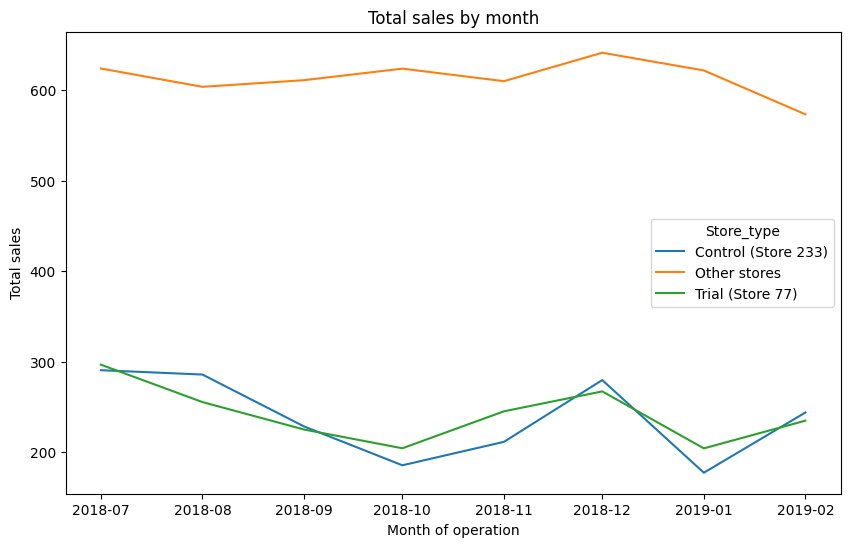

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the store_month_data for sales analysis
measureOverTimeSales = store_month_data.copy()

# Categorize stores into Trial, Control, and Other
measureOverTimeSales['Store_type'] = 'Other stores'
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, 'Store_type'] = f'Trial (Store {trial_store})'
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'Store_type'] = f'Control (Store {control_store})'

# Calculate the average total sales by month and store type for the pre-trial period
pastSales = measureOverTimeSales[measureOverTimeSales['MONTH_ID'] < '201903'].groupby(['MONTH_ID', 'Store_type'])['Total_Sales'].mean().reset_index()

# Convert MONTH_ID to datetime for plotting
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH_ID'], format='%Y%m')

# Plot the total sales by month for each store type
plt.figure(figsize=(10, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y='Total_Sales', hue='Store_type')
plt.title('Total sales by month')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.show()

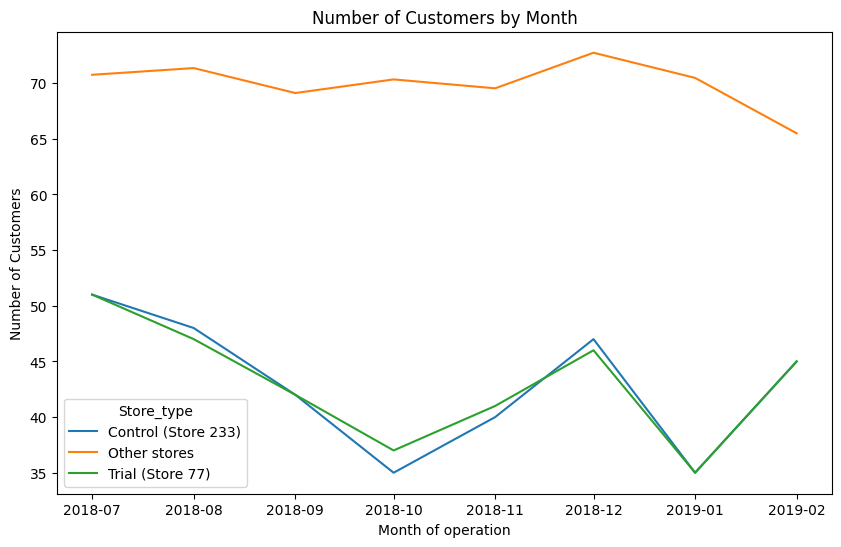

In [ ]:
# Create a copy of the store_month_data for customer analysis
measureOverTimeCusts = store_month_data.copy()

# Categorize stores into Trial, Control, and Other (using the same logic as for sales)
# Modify Store_type to include store number for Trial and Control stores
measureOverTimeCusts['Store_type'] = 'Other stores'
measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store, 'Store_type'] = f'Trial (Store {trial_store})'
measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store, 'Store_type'] = f'Control (Store {control_store})'


# Calculate the average number of customers by month and store type for the pre-trial period
pastCustomers = measureOverTimeCusts[measureOverTimeCusts['MONTH_ID'] < '201903'].groupby(['MONTH_ID', 'Store_type'])['Number_of_Customers'].mean().reset_index()

# Convert MONTH_ID to datetime for plotting
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH_ID'], format='%Y%m')

# Plot the number of customers by month for each store type
plt.figure(figsize=(10, 6))
sns.lineplot(data=pastCustomers, x='TransactionMonth', y='Number_of_Customers', hue='Store_type')
plt.title('Number of Customers by Month')
plt.xlabel('Month of operation')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# Create a copy of the store_month_data for sales analysis
measureOverTimeSales = store_month_data.copy()

# Filter for the pre-trial period
pre_trial_sales = measureOverTimeSales[measureOverTimeSales['MONTH_ID'] < '201902']

# Calculate the sum of pre-trial sales for the trial and control stores
trial_store_sales_sum = pre_trial_sales[pre_trial_sales['STORE_NBR'] == trial_store]['Total_Sales'].sum()
control_store_sales_sum = pre_trial_sales[pre_trial_sales['STORE_NBR'] == control_store]['Total_Sales'].sum()

# Calculate the scaling factor
scalingFactorForControlSales = trial_store_sales_sum / control_store_sales_sum

print(f"Scaling Factor for Control Sales: {scalingFactorForControlSales}")

# Apply the scaling factor to the control store's total sales
scaledControlSales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['Total_Sales'] * scalingFactorForControlSales

print("\n## Scaled Control Sales ##")
display(scaledControlSales.head())

Scaling Factor for Control Sales: 1.023617303289553

## Scaled Control Sales ##


,STORE_NBR,MONTH_ID,Total_Sales,Number_of_Customers,Number_of_Transactions,Total_Chips_Sold,Transactions_per_Customer,Chips_per_Customer,Average_Price_per_Unit,controlSales
2699,233,201807,290.7,51,54,88,1.058824,1.725490,3.303409,297.565550
2700,233,201808,285.9,48,50,80,1.041667,1.666667,3.573750,292.652187
2701,233,201809,228.6,42,45,70,1.071429,1.666667,3.265714,233.998916
2702,233,201810,185.7,35,36,56,1.028571,1.600000,3.316071,190.085733
2703,233,201811,211.6,40,41,62,1.025000,1.550000,3.412903,216.597421


In [ ]:
# Filter for trial store sales
trial_sales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store].copy()

# Merge scaled control sales with trial sales
percentageDiff = pd.merge(scaledControlSales, trial_sales, on='MONTH_ID', suffixes=('_control', '_trial'))

# Calculate the percentage difference
percentageDiff['percentageDiff'] = (percentageDiff['Total_Sales_trial'] - percentageDiff['controlSales']) / percentageDiff['controlSales']

print("## Percentage Difference between Scaled Control Sales and Trial Sales ##")
display(percentageDiff.head(10))

## Percentage Difference between Scaled Control Sales and Trial Sales ##


,STORE_NBR_control,MONTH_ID,Total_Sales_control,Number_of_Customers_control,Number_of_Transactions_control,Total_Chips_Sold_control,Transactions_per_Customer_control,Chips_per_Customer_control,Average_Price_per_Unit_control,controlSales,STORE_NBR_trial,Total_Sales_trial,Number_of_Customers_trial,Number_of_Transactions_trial,Total_Chips_Sold_trial,Transactions_per_Customer_trial,Chips_per_Customer_trial,Average_Price_per_Unit_trial,percentageDiff
0,233,201807,290.7,51,54,88,1.058824,1.725490,3.303409,297.565550,77,296.8,51,55,84,1.078431,1.647059,3.533333,-0.002573
1,233,201808,285.9,48,50,80,1.041667,1.666667,3.573750,292.652187,77,255.5,47,48,74,1.021277,1.574468,3.452703,-0.126950
2,233,201809,228.6,42,45,70,1.071429,1.666667,3.265714,233.998916,77,225.2,42,44,70,1.047619,1.666667,3.217143,-0.037602
3,233,201810,185.7,35,36,56,1.028571,1.600000,3.316071,190.085733,77,204.5,37,38,52,1.027027,1.405405,3.932692,0.075830
4,233,201811,211.6,40,41,62,1.025000,1.550000,3.412903,216.597421,77,245.3,41,44,67,1.073171,1.634146,3.661194,0.132516
5,233,201812,279.8,47,50,75,1.063830,1.595745,3.730667,286.408121,77,267.3,46,49,72,1.065217,1.565217,3.712500,-0.066716
6,233,201901,177.5,35,35,47,1.000000,1.342857,3.776596,181.692071,77,204.4,35,39,65,1.114286,1.857143,3.144615,0.124980
7,233,201902,244.0,45,47,70,1.044444,1.555556,3.485714,249.762622,77,235.0,45,45,74,1.000000,1.644444,3.175676,-0.059107
8,233,201903,199.1,40,41,59,1.025000,1.475000,3.374576,203.802205,77,278.5,50,55,82,1.100000,1.640000,3.396341,0.366521
9,233,201904,158.6,30,33,46,1.100000,1.533333,3.447826,162.345704,77,263.5,47,48,78,1.021277,1.659574,3.378205,0.623080


In [ ]:
from scipy.stats import t

# Calculate the standard deviation of the percentage difference in the pre-trial period
pre_trial_percentage_diff = percentageDiff[percentageDiff['MONTH_ID'] < '201902']['percentageDiff']
std_dev = pre_trial_percentage_diff.std()

# Calculate the degrees of freedom (number of pre-trial months - 1)
# Let's confirm the number of pre-trial months from the data
num_pre_trial_months = pre_trial_percentage_diff.shape[0]
degrees_of_freedom =  num_pre_trial_months - 1 if num_pre_trial_months > 1 else 0

print(f"Standard Deviation of Pre-Trial Percentage Difference: {std_dev}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

# Calculate the t-value for each month in the trial period (from 201902 onwards)
# The null hypothesis is that the difference is 0.
# The test statistic is (observed difference - hypothesized difference) / standard error
# Standard error = standard deviation / sqrt(number of pre-trial months)
trial_percentage_diff = percentageDiff[percentageDiff['MONTH_ID'] >= '201902'].copy()

# Avoid division by zero if std_dev is 0 or num_pre_trial_months is 0
if std_dev > 0 and num_pre_trial_months > 0:
    standard_error = std_dev / np.sqrt(num_pre_trial_months)
    trial_percentage_diff['tValue'] = (trial_percentage_diff['percentageDiff'] - 0) / standard_error
else:
    trial_percentage_diff['tValue'] = np.nan # Cannot calculate t-value

# Find the 95th percentile of the t-distribution
# This is the critical t-value for a one-tailed test at alpha = 0.05
if degrees_of_freedom > 0:
    critical_t_value = t.ppf(0.95, degrees_of_freedom)
else:
    critical_t_value = np.nan # Cannot calculate critical t-value

print(f"Critical t-value (95th percentile): {critical_t_value}")

print("\n## T-values for Trial Months ##")
display(trial_percentage_diff[['MONTH_ID', 'percentageDiff', 'tValue']])


Standard Deviation of Pre-Trial Percentage Difference: 0.09958646884078388
Degrees of Freedom: 6
Critical t-value (95th percentile): 1.9431802805153022

## T-values for Trial Months ##


,MONTH_ID,percentageDiff,tValue
7,201902,-0.059107,-1.570308
8,201903,0.366521,9.737503
9,201904,0.623080,16.553591
10,201905,-0.151003,-4.011764
11,201906,0.170103,4.519187


In [ ]:
# Compare t-values to the critical t-value for statistical significance
print("## Statistical Significance of Sales Difference During Trial Period ##")

if not trial_percentage_diff.empty and not pd.isna(critical_t_value):
    for index, row in trial_percentage_diff.iterrows():
        month = row['MONTH_ID']
        t_value = row['tValue']

        if pd.isna(t_value):
            print(f"For month {month}: Cannot determine statistical significance as t-value is NaN.")
        elif abs(t_value) > critical_t_value:
            print(f"For month {month}: The sales difference is statistically significant (t-value = {t_value:.2f}, critical t-value = {critical_t_value:.2f}).")
        else:
            print(f"For month {month}: The sales difference is NOT statistically significant (t-value = {t_value:.2f}, critical t-value = {critical_t_value:.2f}).")
else:
    print("Cannot determine statistical significance. Please check the t-value calculations and the critical t-value.")

## Statistical Significance of Sales Difference During Trial Period ##
For month 201902: The sales difference is NOT statistically significant (t-value = -1.57, critical t-value = 1.94).
For month 201903: The sales difference is statistically significant (t-value = 9.74, critical t-value = 1.94).
For month 201904: The sales difference is statistically significant (t-value = 16.55, critical t-value = 1.94).
For month 201905: The sales difference is statistically significant (t-value = -4.01, critical t-value = 1.94).
For month 201906: The sales difference is statistically significant (t-value = 4.52, critical t-value = 1.94).


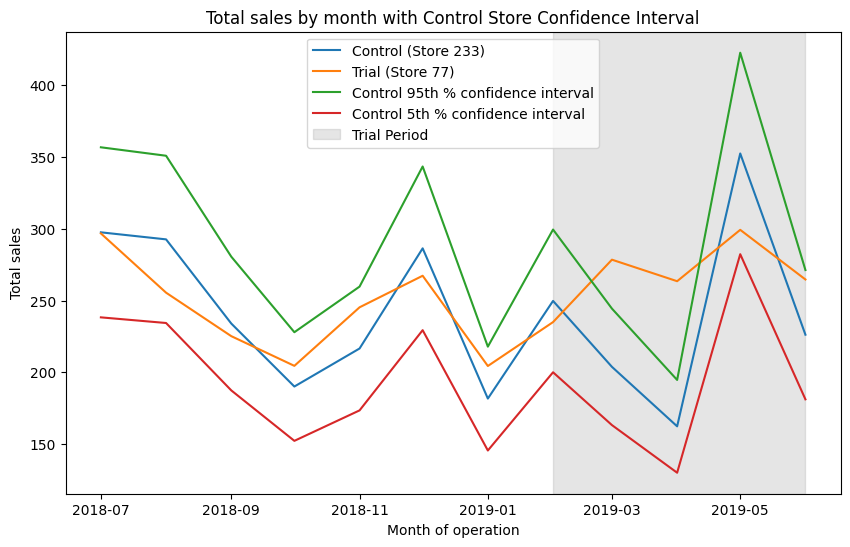

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse scaledControlSales from previous step
# Filter for trial store sales
trial_sales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store].copy()

# Add 'Store_type' column to trial and scaled control sales dataframes
trial_sales['Store_type'] = f'Trial (Store {trial_store})'
scaledControlSales['Store_type'] = f'Control (Store {control_store})'

# Calculate 95% confidence interval for scaled control sales
# Upper bound: scaledControlSales * (1 + stdDev * 2)
# Lower bound: scaledControlSales * (1 - stdDev * 2)
# Make copies to avoid SettingWithCopyWarning
pastSales_Controls95 = scaledControlSales.copy()
pastSales_Controls95['controlSales'] = pastSales_Controls95['controlSales'] * (1 + std_dev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

pastSales_Controls5 = scaledControlSales.copy()
pastSales_Controls5['controlSales'] = pastSales_Controls5['controlSales'] * (1 - std_dev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Prepare data for plotting
# Select relevant columns and rename 'controlSales' to 'Total_Sales' for concatenation
scaledControlSales_plot = scaledControlSales[['MONTH_ID', 'controlSales', 'Store_type']].rename(columns={'controlSales': 'Total_Sales'})
trial_sales_plot = trial_sales[['MONTH_ID', 'Total_Sales', 'Store_type']]
pastSales_Controls95_plot = pastSales_Controls95[['MONTH_ID', 'controlSales', 'Store_type']].rename(columns={'controlSales': 'Total_Sales'})
pastSales_Controls5_plot = pastSales_Controls5[['MONTH_ID', 'controlSales', 'Store_type']].rename(columns={'controlSales': 'Total_Sales'})


# Combine all dataframes
trialAssessment = pd.concat([scaledControlSales_plot, trial_sales_plot, pastSales_Controls95_plot, pastSales_Controls5_plot], ignore_index=True)

# Convert MONTH_ID to datetime for plotting
trialAssessment['TransactionMonth'] = pd.to_datetime(trialAssessment['MONTH_ID'], format='%Y%m')

# Plot the total sales with confidence intervals and trial period highlighted
plt.figure(figsize=(10, 6))
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='Total_Sales', hue='Store_type')

# Add shaded region for the trial period (February 2019 to June 2019)
# Define the start and end dates of the trial period
trial_start_date = pd.to_datetime('201902', format='%Y%m')
trial_end_date = pd.to_datetime('201906', format='%Y%m') # Assuming trial ends in June 2019

plt.axvspan(trial_start_date, trial_end_date, color='grey', alpha=0.2, label='Trial Period')


plt.title('Total sales by month with Control Store Confidence Interval')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.legend() # Show legend to include the trial period label
plt.show()

In [ ]:
# Filter for trial store customer counts
trial_customers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == trial_store].copy()

# Filter for the pre-trial period for customer counts
pre_trial_customers = measureOverTimeCusts[measureOverTimeCusts['MONTH_ID'] < '201902']

# Calculate the sum of pre-trial customers for the trial and control stores
trial_store_cust_sum = pre_trial_customers[pre_trial_customers['STORE_NBR'] == trial_store]['Number_of_Customers'].sum()
control_store_cust_sum = pre_trial_customers[pre_trial_customers['STORE_NBR'] == control_store]['Number_of_Customers'].sum()

# Avoid division by zero
if control_store_cust_sum == 0:
    print("Error: Control store pre-trial customer sum is zero. Cannot calculate scaling factor.")
    # You might want to handle this case differently, e.g., skip plotting or use a default scaling factor
else:
    # Calculate the scaling factor for customer counts
    scalingFactorForControlCust = trial_store_cust_sum / control_store_cust_sum

    print(f"Scaling Factor for Control Customers: {scalingFactorForControlCust}")

    # Apply the scaling factor to the control store's customer counts
    scaledControlCustomers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == control_store].copy()
    scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Number_of_Customers'] * scalingFactorForControlCust

    print("\n## Scaled Control Customers ##")
    display(scaledControlCustomers.head())

    # Merge scaled control customers with trial customers
    percentageDiff_cust = pd.merge(scaledControlCustomers, trial_customers, on='MONTH_ID', suffixes=('_control', '_trial'))

    # Calculate the percentage difference for customer counts
    percentageDiff_cust['percentageDiff'] = (percentageDiff_cust['Number_of_Customers_trial'] - percentageDiff_cust['controlCustomers']) / percentageDiff_cust['controlCustomers']

    print("\n## Percentage Difference between Scaled Control Customers and Trial Customers ##")
    display(percentageDiff_cust.head())

Scaling Factor for Control Customers: 1.0033557046979866

## Scaled Control Customers ##


,STORE_NBR,MONTH_ID,Total_Sales,Number_of_Customers,Number_of_Transactions,Total_Chips_Sold,Transactions_per_Customer,Chips_per_Customer,Average_Price_per_Unit,Store_type,controlCustomers
2699,233,201807,290.7,51,54,88,1.058824,1.725490,3.303409,Control (Store 233),51.171141
2700,233,201808,285.9,48,50,80,1.041667,1.666667,3.573750,Control (Store 233),48.161074
2701,233,201809,228.6,42,45,70,1.071429,1.666667,3.265714,Control (Store 233),42.140940
2702,233,201810,185.7,35,36,56,1.028571,1.600000,3.316071,Control (Store 233),35.117450
2703,233,201811,211.6,40,41,62,1.025000,1.550000,3.412903,Control (Store 233),40.134228



## Percentage Difference between Scaled Control Customers and Trial Customers ##


,STORE_NBR_control,MONTH_ID,Total_Sales_control,Number_of_Customers_control,Number_of_Transactions_control,Total_Chips_Sold_control,Transactions_per_Customer_control,Chips_per_Customer_control,Average_Price_per_Unit_control,Store_type_control,...,STORE_NBR_trial,Total_Sales_trial,Number_of_Customers_trial,Number_of_Transactions_trial,Total_Chips_Sold_trial,Transactions_per_Customer_trial,Chips_per_Customer_trial,Average_Price_per_Unit_trial,Store_type_trial,percentageDiff
0,233,201807,290.7,51,54,88,1.058824,1.725490,3.303409,Control (Store 233),...,77,296.8,51,55,84,1.078431,1.647059,3.533333,Trial (Store 77),-0.003344
1,233,201808,285.9,48,50,80,1.041667,1.666667,3.573750,Control (Store 233),...,77,255.5,47,48,74,1.021277,1.574468,3.452703,Trial (Store 77),-0.024108
2,233,201809,228.6,42,45,70,1.071429,1.666667,3.265714,Control (Store 233),...,77,225.2,42,44,70,1.047619,1.666667,3.217143,Trial (Store 77),-0.003344
3,233,201810,185.7,35,36,56,1.028571,1.600000,3.316071,Control (Store 233),...,77,204.5,37,38,52,1.027027,1.405405,3.932692,Trial (Store 77),0.053607
4,233,201811,211.6,40,41,62,1.025000,1.550000,3.412903,Control (Store 233),...,77,245.3,41,44,67,1.073171,1.634146,3.661194,Trial (Store 77),0.021572


Scaling Factor for Control Customers: 1.0033557046979866
Standard Deviation of Pre-Trial Percentage Difference (Customers): 0.02743996009077893


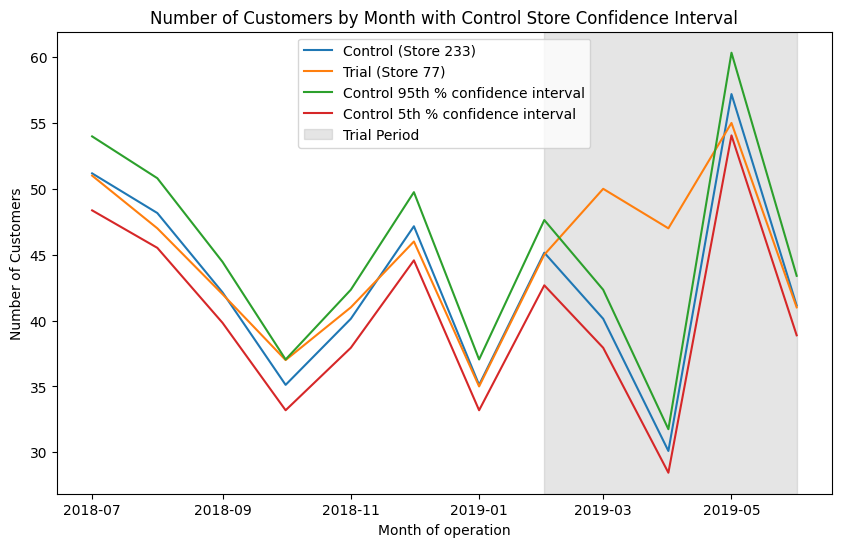

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t # Import t for critical value if needed later

# Create a copy of the store_month_data for customer analysis (if not already available)
# measureOverTimeCusts = store_month_data.copy() # Assuming measureOverTimeCusts is already created and up-to-date

# Filter for the pre-trial period for customer counts
pre_trial_customers = measureOverTimeCusts[measureOverTimeCusts['MONTH_ID'] < '201902']

# Calculate the sum of pre-trial customers for the trial and control stores
trial_store_cust_sum = pre_trial_customers[pre_trial_customers['STORE_NBR'] == trial_store]['Number_of_Customers'].sum()
control_store_cust_sum = pre_trial_customers[pre_trial_customers['STORE_NBR'] == control_store]['Number_of_Customers'].sum()

# Avoid division by zero
if control_store_cust_sum == 0:
    print("Error: Control store pre-trial customer sum is zero. Cannot calculate scaling factor.")
    # You might want to handle this case differently, e.g., skip plotting or use a default scaling factor
else:
    # Calculate the scaling factor for customer counts
    scalingFactorForControlCust = trial_store_cust_sum / control_store_cust_sum

    print(f"Scaling Factor for Control Customers: {scalingFactorForControlCust}")

    # Apply the scaling factor to the control store's customer counts
    scaledControlCustomers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == control_store].copy()
    scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Number_of_Customers'] * scalingFactorForControlCust

    # Filter for trial store customer counts
    trial_customers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == trial_store].copy()

    # Merge scaled control customers with trial customers
    percentageDiff_cust = pd.merge(scaledControlCustomers, trial_customers, on='MONTH_ID', suffixes=('_control', '_trial'))

    # Calculate the percentage difference for customer counts
    percentageDiff_cust['percentageDiff'] = (percentageDiff_cust['Number_of_Customers_trial'] - percentageDiff_cust['controlCustomers']) / percentageDiff_cust['controlCustomers']

    # Calculate the standard deviation of the percentage difference in the pre-trial period for customers
    pre_trial_percentage_diff_cust = percentageDiff_cust[percentageDiff_cust['MONTH_ID'] < '201902']['percentageDiff']
    std_dev_cust = pre_trial_percentage_diff_cust.std()

    print(f"Standard Deviation of Pre-Trial Percentage Difference (Customers): {std_dev_cust}")

    # Reuse scaledControlCustomers and trial_customers from previous steps

    # Add 'Store_type' column to trial and scaled control customer dataframes
    trial_customers['Store_type'] = f'Trial (Store {trial_store})'
    scaledControlCustomers['Store_type'] = f'Control (Store {control_store})'

    # Calculate 95% confidence interval for scaled control customers
    # Upper bound: scaledControlCustomers * (1 + stdDev_cust * 2)
    # Lower bound: scaledControlCustomers * (1 - stdDev_cust * 2)
    # Make copies to avoid SettingWithCopyWarning
    pastCustomers_Controls95 = scaledControlCustomers.copy()
    pastCustomers_Controls95['controlCustomers'] = pastCustomers_Controls95['controlCustomers'] * (1 + std_dev_cust * 2)
    pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

    pastCustomers_Controls5 = scaledControlCustomers.copy()
    pastCustomers_Controls5['controlCustomers'] = pastCustomers_Controls5['controlCustomers'] * (1 - std_dev_cust * 2)
    pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

    # Prepare data for plotting
    # Select relevant columns and rename 'controlCustomers' to 'Number_of_Customers' for concatenation
    scaledControlCustomers_plot = scaledControlCustomers[['MONTH_ID', 'controlCustomers', 'Store_type']].rename(columns={'controlCustomers': 'Number_of_Customers'})
    trial_customers_plot = trial_customers[['MONTH_ID', 'Number_of_Customers', 'Store_type']]
    pastCustomers_Controls95_plot = pastCustomers_Controls95[['MONTH_ID', 'controlCustomers', 'Store_type']].rename(columns={'controlCustomers': 'Number_of_Customers'})
    pastCustomers_Controls5_plot = pastCustomers_Controls5[['MONTH_ID', 'controlCustomers', 'Store_type']].rename(columns={'controlCustomers': 'Number_of_Customers'})


    # Combine all dataframes
    trialAssessment_cust = pd.concat([scaledControlCustomers_plot, trial_customers_plot, pastCustomers_Controls95_plot, pastCustomers_Controls5_plot], ignore_index=True)

    # Convert MONTH_ID to datetime for plotting
    trialAssessment_cust['TransactionMonth'] = pd.to_datetime(trialAssessment_cust['MONTH_ID'], format='%Y%m')

    # Plot the number of customers with confidence intervals and trial period highlighted
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=trialAssessment_cust, x='TransactionMonth', y='Number_of_Customers', hue='Store_type')

    # Add shaded region for the trial period (February 2019 to June 2019)
    # Define the start and end dates of the trial period (adjust if your trial period is different)
    trial_start_date = pd.to_datetime('201902', format='%Y%m')
    trial_end_date = pd.to_datetime('201906', format='%Y%m') # Assuming trial ends in June 2019

    plt.axvspan(trial_start_date, trial_end_date, color='grey', alpha=0.2, label='Trial Period')

    plt.title('Number of Customers by Month with Control Store Confidence Interval')
    plt.xlabel('Month of operation')
    plt.ylabel('Number of Customers')
    plt.legend() # Show legend to include the trial period label
    plt.show()

# TRIAL STORE 86

In [ ]:
# Define the trial store
trial_store = 86

# Calculate correlation for 'Total_Sales' against store 86
corr_nSales = calculate_correlation(pre_trial_measures, 'Total_Sales', trial_store)
print("## Correlation of Total Sales with Store 86 ##")
display(corr_nSales.head())
# Calculate correlation for 'Number_of_Customers' against store 77
corr_nCustomers = calculate_correlation(pre_trial_measures, 'Number_of_Customers', trial_store)
print("\n## Correlation of Number of Customers with Store 86 ##")
display(corr_nCustomers.head())

# Calculate magnitude distance for 'Total_Sales' against store 77
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, 'Total_Sales', trial_store)
print("\n## Magnitude Distance of Total Sales with Store 86 ##")
display(magnitude_nSales.head())

# Calculate magnitude distance for 'Number_of_Customers' against store 77
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, 'Number_of_Customers', trial_store)
print("\n## Magnitude Distance of Number of Customers with Store 86 ##")
display(magnitude_nCustomers.head())

/tmp/ipython-input-86-3974181785.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calc_corr_table = pd.concat([calc_corr_table, calculated_measure], ignore_index=True)


## Correlation of Total Sales with Store 86 ##


,Store1,Store2,corr_measure
0,86,1,0.445632
1,86,2,-0.403835
2,86,3,-0.261284
3,86,4,-0.039035
4,86,5,0.235159


/tmp/ipython-input-86-3974181785.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calc_corr_table = pd.concat([calc_corr_table, calculated_measure], ignore_index=True)



## Correlation of Number of Customers with Store 86 ##


,Store1,Store2,corr_measure
0,86,1,0.485831
1,86,2,-0.086161
2,86,3,-0.353786
3,86,4,-0.169608
4,86,5,-0.253229


/tmp/ipython-input-87-1384577921.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calc_dist_table = pd.concat([calc_dist_table, calculated_measure], ignore_index=True)



## Magnitude Distance of Total Sales with Store 86 ##


,Store1,Store2,mag_measure
0,86,1,0.220565
1,86,2,0.179640
2,86,3,0.762894
3,86,4,0.498526
4,86,5,0.929321



## Magnitude Distance of Number of Customers with Store 86 ##


,Store1,Store2,mag_measure
0,86,1,0.444597
1,86,2,0.38062
2,86,3,0.91185
3,86,4,0.773922
4,86,5,0.926509


In [ ]:
# Define the weight for correlation
corr_weight = 0.5

# Merge correlation and magnitude distance for Total Sales and calculate the combined score
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = corr_weight * score_nSales['corr_measure'] + (1 - corr_weight) * score_nSales['mag_measure']

# Merge correlation and magnitude distance for Number of Customers and calculate the combined score
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = corr_weight * score_nCustomers['corr_measure'] + (1 - corr_weight) * score_nCustomers['mag_measure']

# Display the resulting dataframes
print("## Combined Score for Total Sales ##")
display(score_nSales.head())

print("\n## Combined Score for Number of Customers ##")
display(score_nCustomers.head())

## Combined Score for Total Sales ##


,Store1,Store2,corr_measure,mag_measure,scoreNSales
0,86,1,0.445632,0.220565,0.333099
1,86,2,-0.403835,0.179640,-0.112097
2,86,3,-0.261284,0.762894,0.250805
3,86,4,-0.039035,0.498526,0.229745
4,86,5,0.235159,0.929321,0.582240



## Combined Score for Number of Customers ##


,Store1,Store2,corr_measure,mag_measure,scoreNCust
0,86,1,0.485831,0.444597,0.465214
1,86,2,-0.086161,0.38062,0.14723
2,86,3,-0.353786,0.91185,0.279032
3,86,4,-0.169608,0.773922,0.302157
4,86,5,-0.253229,0.926509,0.33664


In [ ]:
# Combine sales and customer scores
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'])

# Calculate the final control score
score_Control['finalControlScore'] = score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCust'] * 0.5

# Order the results in descending order of finalControlScore
score_Control = score_Control.sort_values(by='finalControlScore', ascending=False).reset_index(drop=True)

print("## Combined Control Scores ##")
display(score_Control.head())


## Combined Control Scores ##


,Store1,Store2,corr_measure_x,mag_measure_x,scoreNSales,corr_measure_y,mag_measure_y,scoreNCust,finalControlScore
0,86,155,0.877882,0.964782,0.921332,0.942876,0.985037,0.963956,0.942644
1,86,109,0.788300,0.963810,0.876055,0.770778,0.96594,0.868359,0.872207
2,86,114,0.734415,0.921021,0.827718,0.855339,0.935508,0.895424,0.861571
3,86,138,0.759864,0.925434,0.842649,0.749701,0.928031,0.838866,0.840757
4,86,225,0.617533,0.958060,0.787796,0.733791,0.967367,0.850579,0.819188


In [ ]:
# Select the store with the highest final control score
control_store = score_Control.loc[score_Control['finalControlScore'].idxmax(), 'Store2']

print(f"The selected control store for trial store 86 is: {control_store}")

The selected control store for trial store 86 is: 155


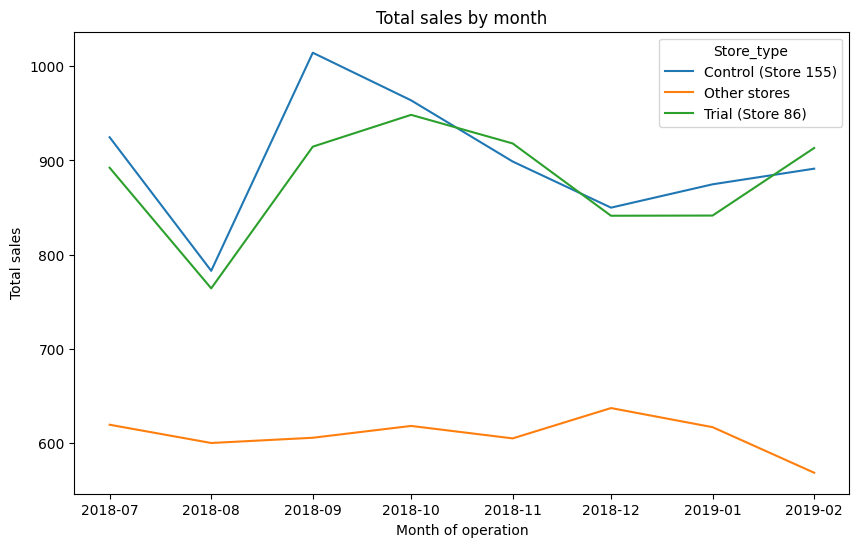

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the store_month_data for sales analysis
measureOverTimeSales = store_month_data.copy()

# Categorize stores into Trial, Control, and Other
measureOverTimeSales['Store_type'] = 'Other stores'
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, 'Store_type'] = f'Trial (Store {trial_store})'
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'Store_type'] = f'Control (Store {control_store})'

# Calculate the average total sales by month and store type for the pre-trial period
pastSales = measureOverTimeSales[measureOverTimeSales['MONTH_ID'] < '201903'].groupby(['MONTH_ID', 'Store_type'])['Total_Sales'].mean().reset_index()

# Convert MONTH_ID to datetime for plotting
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH_ID'], format='%Y%m')

# Plot the total sales by month for each store type
plt.figure(figsize=(10, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y='Total_Sales', hue='Store_type')
plt.title('Total sales by month')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.show()

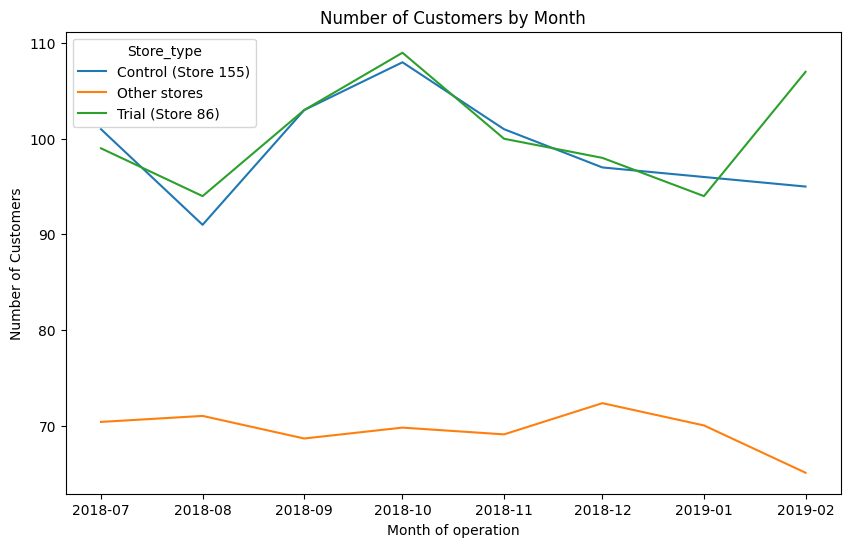

In [ ]:
# Create a copy of the store_month_data for customer analysis
measureOverTimeCusts = store_month_data.copy()

# Categorize stores into Trial, Control, and Other (using the same logic as for sales)
# Modify Store_type to include store number for Trial and Control stores
measureOverTimeCusts['Store_type'] = 'Other stores'
measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store, 'Store_type'] = f'Trial (Store {trial_store})'
measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store, 'Store_type'] = f'Control (Store {control_store})'


# Calculate the average number of customers by month and store type for the pre-trial period
pastCustomers = measureOverTimeCusts[measureOverTimeCusts['MONTH_ID'] < '201903'].groupby(['MONTH_ID', 'Store_type'])['Number_of_Customers'].mean().reset_index()

# Convert MONTH_ID to datetime for plotting
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH_ID'], format='%Y%m')

# Plot the number of customers by month for each store type
plt.figure(figsize=(10, 6))
sns.lineplot(data=pastCustomers, x='TransactionMonth', y='Number_of_Customers', hue='Store_type')
plt.title('Number of Customers by Month')
plt.xlabel('Month of operation')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# Create a copy of the store_month_data for sales analysis
measureOverTimeSales = store_month_data.copy()

# Filter for the pre-trial period
pre_trial_sales = measureOverTimeSales[measureOverTimeSales['MONTH_ID'] < '201902']

# Calculate the sum of pre-trial sales for the trial and control stores
trial_store_sales_sum = pre_trial_sales[pre_trial_sales['STORE_NBR'] == trial_store]['Total_Sales'].sum()
control_store_sales_sum = pre_trial_sales[pre_trial_sales['STORE_NBR'] == control_store]['Total_Sales'].sum()

# Calculate the scaling factor
scalingFactorForControlSales = trial_store_sales_sum / control_store_sales_sum

print(f"Scaling Factor for Control Sales: {scalingFactorForControlSales}")

# Apply the scaling factor to the control store's total sales
scaledControlSales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['Total_Sales'] * scalingFactorForControlSales

print("\n## Scaled Control Sales ##")
display(scaledControlSales.head())

Scaling Factor for Control Sales: 0.9700651481287743

## Scaled Control Sales ##


,STORE_NBR,MONTH_ID,Total_Sales,Number_of_Customers,Number_of_Transactions,Total_Chips_Sold,Transactions_per_Customer,Chips_per_Customer,Average_Price_per_Unit,controlSales
1793,155,201807,924.6,101,125,250,1.237624,2.475248,3.698400,896.922236
1794,155,201808,782.7,91,120,229,1.318681,2.516484,3.417904,759.269991
1795,155,201809,1014.4,103,145,290,1.407767,2.815534,3.497931,984.034086
1796,155,201810,963.8,108,136,272,1.259259,2.518519,3.543382,934.948790
1797,155,201811,898.8,101,135,270,1.336634,2.673267,3.328889,871.894555


In [ ]:
# Filter for trial store sales
trial_sales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store].copy()

# Merge scaled control sales with trial sales
percentageDiff = pd.merge(scaledControlSales, trial_sales, on='MONTH_ID', suffixes=('_control', '_trial'))

# Calculate the percentage difference
percentageDiff['percentageDiff'] = (percentageDiff['Total_Sales_trial'] - percentageDiff['controlSales']) / percentageDiff['controlSales']

print("## Percentage Difference between Scaled Control Sales and Trial Sales ##")
display(percentageDiff.head())

## Percentage Difference between Scaled Control Sales and Trial Sales ##


,STORE_NBR_control,MONTH_ID,Total_Sales_control,Number_of_Customers_control,Number_of_Transactions_control,Total_Chips_Sold_control,Transactions_per_Customer_control,Chips_per_Customer_control,Average_Price_per_Unit_control,controlSales,STORE_NBR_trial,Total_Sales_trial,Number_of_Customers_trial,Number_of_Transactions_trial,Total_Chips_Sold_trial,Transactions_per_Customer_trial,Chips_per_Customer_trial,Average_Price_per_Unit_trial,percentageDiff
0,155,201807,924.6,101,125,250,1.237624,2.475248,3.698400,896.922236,86,892.20,99,126,251,1.272727,2.535354,3.554582,-0.005265
1,155,201808,782.7,91,120,229,1.318681,2.516484,3.417904,759.269991,86,764.05,94,112,215,1.191489,2.287234,3.553721,0.006296
2,155,201809,1014.4,103,145,290,1.407767,2.815534,3.497931,984.034086,86,914.60,103,129,258,1.252427,2.504854,3.544961,-0.070561
3,155,201810,963.8,108,136,272,1.259259,2.518519,3.543382,934.948790,86,948.40,109,138,276,1.266055,2.532110,3.436232,0.014387
4,155,201811,898.8,101,135,270,1.336634,2.673267,3.328889,871.894555,86,918.00,100,127,254,1.270000,2.540000,3.614173,0.052880


In [ ]:
from scipy.stats import t

# Calculate the standard deviation of the percentage difference in the pre-trial period
pre_trial_percentage_diff = percentageDiff[percentageDiff['MONTH_ID'] < '201902']['percentageDiff']
std_dev = pre_trial_percentage_diff.std()

# Calculate the degrees of freedom (number of pre-trial months - 1)
# Let's confirm the number of pre-trial months from the data
num_pre_trial_months = pre_trial_percentage_diff.shape[0]
degrees_of_freedom = num_pre_trial_months - 1 if num_pre_trial_months > 1 else 0

print(f"Standard Deviation of Pre-Trial Percentage Difference: {std_dev}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

# Calculate the t-value for each month in the trial period (from 201902 onwards)
# The null hypothesis is that the difference is 0.
# The test statistic is (observed difference - hypothesized difference) / standard error
# Standard error = standard deviation / sqrt(number of pre-trial months)
trial_percentage_diff = percentageDiff[percentageDiff['MONTH_ID'] >= '201902'].copy()

# Avoid division by zero if std_dev is 0 or num_pre_trial_months is 0
if std_dev > 0 and num_pre_trial_months > 0:
    standard_error = std_dev / np.sqrt(num_pre_trial_months)
    trial_percentage_diff['tValue'] = (trial_percentage_diff['percentageDiff'] - 0) / standard_error
else:
    trial_percentage_diff['tValue'] = np.nan # Cannot calculate t-value

# Find the 95th percentile of the t-distribution
# This is the critical t-value for a one-tailed test at alpha = 0.05
if degrees_of_freedom > 0:
    critical_t_value = t.ppf(0.95, degrees_of_freedom)
else:
    critical_t_value = np.nan # Cannot calculate critical t-value

print(f"Critical t-value (95th percentile): {critical_t_value}")

print("\n## T-values for Trial Months ##")
display(trial_percentage_diff[['MONTH_ID', 'percentageDiff', 'tValue']])


Standard Deviation of Pre-Trial Percentage Difference: 0.03768532790008376
Degrees of Freedom: 6
Critical t-value (95th percentile): 1.9431802805153022

## T-values for Trial Months ##


,MONTH_ID,percentageDiff,tValue
7,201902,0.056306,3.953055
8,201903,0.315870,22.176077
9,201904,0.035253,2.474951
10,201905,-0.006618,-0.464628
11,201906,0.007769,0.545427


In [ ]:
# Compare t-values to the critical t-value for statistical significance
print("## Statistical Significance of Sales Difference During Trial Period ##")

if not trial_percentage_diff.empty and not pd.isna(critical_t_value):
    for index, row in trial_percentage_diff.iterrows():
        month = row['MONTH_ID']
        t_value = row['tValue']

        if pd.isna(t_value):
            print(f"For month {month}: Cannot determine statistical significance as t-value is NaN.")
        elif abs(t_value) > critical_t_value:
            print(f"For month {month}: The sales difference is statistically significant (t-value = {t_value:.2f}, critical t-value = {critical_t_value:.2f}).")
        else:
            print(f"For month {month}: The sales difference is NOT statistically significant (t-value = {t_value:.2f}, critical t-value = {critical_t_value:.2f}).")
else:
    print("Cannot determine statistical significance. Please check the t-value calculations and the critical t-value.")

## Statistical Significance of Sales Difference During Trial Period ##
For month 201902: The sales difference is statistically significant (t-value = 3.95, critical t-value = 1.94).
For month 201903: The sales difference is statistically significant (t-value = 22.18, critical t-value = 1.94).
For month 201904: The sales difference is statistically significant (t-value = 2.47, critical t-value = 1.94).
For month 201905: The sales difference is NOT statistically significant (t-value = -0.46, critical t-value = 1.94).
For month 201906: The sales difference is NOT statistically significant (t-value = 0.55, critical t-value = 1.94).


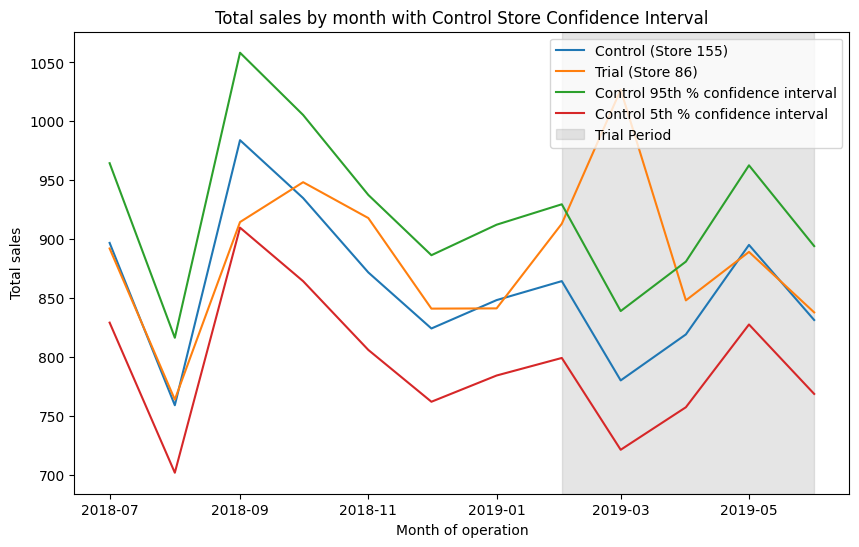

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse scaledControlSales from previous step
# Filter for trial store sales
trial_sales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store].copy()

# Add 'Store_type' column to trial and scaled control sales dataframes
trial_sales['Store_type'] = f'Trial (Store {trial_store})'
scaledControlSales['Store_type'] = f'Control (Store {control_store})'

# Calculate 95% confidence interval for scaled control sales
# Upper bound: scaledControlSales * (1 + stdDev * 2)
# Lower bound: scaledControlSales * (1 - stdDev * 2)
# Make copies to avoid SettingWithCopyWarning
pastSales_Controls95 = scaledControlSales.copy()
pastSales_Controls95['controlSales'] = pastSales_Controls95['controlSales'] * (1 + std_dev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

pastSales_Controls5 = scaledControlSales.copy()
pastSales_Controls5['controlSales'] = pastSales_Controls5['controlSales'] * (1 - std_dev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Prepare data for plotting
# Select relevant columns and rename 'controlSales' to 'Total_Sales' for concatenation
scaledControlSales_plot = scaledControlSales[['MONTH_ID', 'controlSales', 'Store_type']].rename(columns={'controlSales': 'Total_Sales'})
trial_sales_plot = trial_sales[['MONTH_ID', 'Total_Sales', 'Store_type']]
pastSales_Controls95_plot = pastSales_Controls95[['MONTH_ID', 'controlSales', 'Store_type']].rename(columns={'controlSales': 'Total_Sales'})
pastSales_Controls5_plot = pastSales_Controls5[['MONTH_ID', 'controlSales', 'Store_type']].rename(columns={'controlSales': 'Total_Sales'})


# Combine all dataframes
trialAssessment = pd.concat([scaledControlSales_plot, trial_sales_plot, pastSales_Controls95_plot, pastSales_Controls5_plot], ignore_index=True)

# Convert MONTH_ID to datetime for plotting
trialAssessment['TransactionMonth'] = pd.to_datetime(trialAssessment['MONTH_ID'], format='%Y%m')

# Plot the total sales with confidence intervals and trial period highlighted
plt.figure(figsize=(10, 6))
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='Total_Sales', hue='Store_type')

# Add shaded region for the trial period (February 2019 to June 2019)
# Define the start and end dates of the trial period
trial_start_date = pd.to_datetime('201902', format='%Y%m')
trial_end_date = pd.to_datetime('201906', format='%Y%m') # Assuming trial ends in June 2019

plt.axvspan(trial_start_date, trial_end_date, color='grey', alpha=0.2, label='Trial Period')


plt.title('Total sales by month with Control Store Confidence Interval')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.legend() # Show legend to include the trial period label
plt.show()

In [ ]:
# Filter for trial store customer counts
trial_customers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == trial_store].copy()

# Filter for the pre-trial period for customer counts
pre_trial_customers = measureOverTimeCusts[measureOverTimeCusts['MONTH_ID'] < '201902']

# Calculate the sum of pre-trial customers for the trial and control stores
trial_store_cust_sum = pre_trial_customers[pre_trial_customers['STORE_NBR'] == trial_store]['Number_of_Customers'].sum()
control_store_cust_sum = pre_trial_customers[pre_trial_customers['STORE_NBR'] == control_store]['Number_of_Customers'].sum()

# Avoid division by zero
if control_store_cust_sum == 0:
    print("Error: Control store pre-trial customer sum is zero. Cannot calculate scaling factor.")
    # You might want to handle this case differently, e.g., skip plotting or use a default scaling factor
else:
    # Calculate the scaling factor for customer counts
    scalingFactorForControlCust = trial_store_cust_sum / control_store_cust_sum

    print(f"Scaling Factor for Control Customers: {scalingFactorForControlCust}")

    # Apply the scaling factor to the control store's customer counts
    scaledControlCustomers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == control_store].copy()
    scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Number_of_Customers'] * scalingFactorForControlCust

    print("\n## Scaled Control Customers ##")
    display(scaledControlCustomers.head())

    # Merge scaled control customers with trial customers
    percentageDiff_cust = pd.merge(scaledControlCustomers, trial_customers, on='MONTH_ID', suffixes=('_control', '_trial'))

    # Calculate the percentage difference for customer counts
    percentageDiff_cust['percentageDiff'] = (percentageDiff_cust['Number_of_Customers_trial'] - percentageDiff_cust['controlCustomers']) / percentageDiff_cust['controlCustomers']

    print("\n## Percentage Difference between Scaled Control Customers and Trial Customers ##")
    display(percentageDiff_cust.head())

Scaling Factor for Control Customers: 1.0

## Scaled Control Customers ##


,STORE_NBR,MONTH_ID,Total_Sales,Number_of_Customers,Number_of_Transactions,Total_Chips_Sold,Transactions_per_Customer,Chips_per_Customer,Average_Price_per_Unit,Store_type,controlCustomers
1793,155,201807,924.6,101,125,250,1.237624,2.475248,3.698400,Control (Store 155),101.0
1794,155,201808,782.7,91,120,229,1.318681,2.516484,3.417904,Control (Store 155),91.0
1795,155,201809,1014.4,103,145,290,1.407767,2.815534,3.497931,Control (Store 155),103.0
1796,155,201810,963.8,108,136,272,1.259259,2.518519,3.543382,Control (Store 155),108.0
1797,155,201811,898.8,101,135,270,1.336634,2.673267,3.328889,Control (Store 155),101.0



## Percentage Difference between Scaled Control Customers and Trial Customers ##


,STORE_NBR_control,MONTH_ID,Total_Sales_control,Number_of_Customers_control,Number_of_Transactions_control,Total_Chips_Sold_control,Transactions_per_Customer_control,Chips_per_Customer_control,Average_Price_per_Unit_control,Store_type_control,...,STORE_NBR_trial,Total_Sales_trial,Number_of_Customers_trial,Number_of_Transactions_trial,Total_Chips_Sold_trial,Transactions_per_Customer_trial,Chips_per_Customer_trial,Average_Price_per_Unit_trial,Store_type_trial,percentageDiff
0,155,201807,924.6,101,125,250,1.237624,2.475248,3.698400,Control (Store 155),...,86,892.20,99,126,251,1.272727,2.535354,3.554582,Trial (Store 86),-0.019802
1,155,201808,782.7,91,120,229,1.318681,2.516484,3.417904,Control (Store 155),...,86,764.05,94,112,215,1.191489,2.287234,3.553721,Trial (Store 86),0.032967
2,155,201809,1014.4,103,145,290,1.407767,2.815534,3.497931,Control (Store 155),...,86,914.60,103,129,258,1.252427,2.504854,3.544961,Trial (Store 86),0.000000
3,155,201810,963.8,108,136,272,1.259259,2.518519,3.543382,Control (Store 155),...,86,948.40,109,138,276,1.266055,2.532110,3.436232,Trial (Store 86),0.009259
4,155,201811,898.8,101,135,270,1.336634,2.673267,3.328889,Control (Store 155),...,86,918.00,100,127,254,1.270000,2.540000,3.614173,Trial (Store 86),-0.009901


Standard Deviation of Pre-Trial Percentage Difference (Customers): 0.019159180382211954


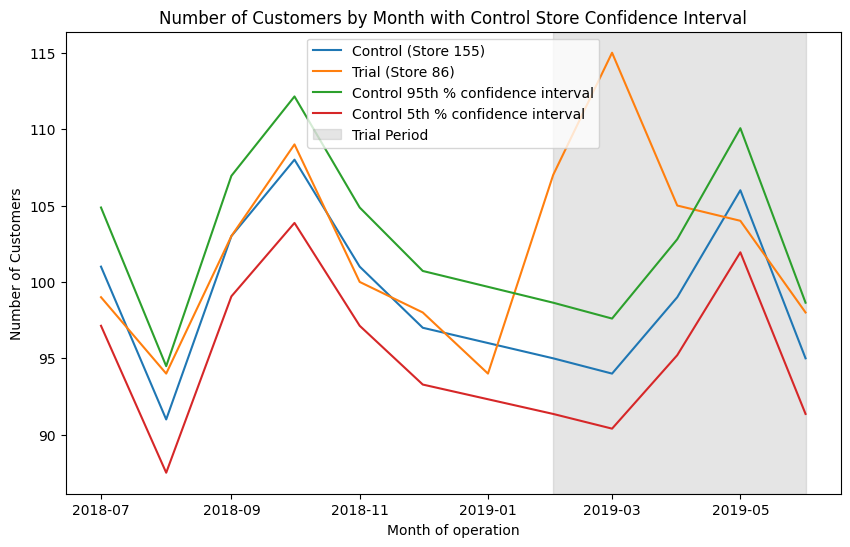

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t # Import t for critical value if needed later

# Calculate the standard deviation of the percentage difference in the pre-trial period for customers
pre_trial_percentage_diff_cust = percentageDiff_cust[percentageDiff_cust['MONTH_ID'] < '201902']['percentageDiff']
std_dev_cust = pre_trial_percentage_diff_cust.std()

print(f"Standard Deviation of Pre-Trial Percentage Difference (Customers): {std_dev_cust}")

# Reuse scaledControlCustomers and trial_customers from previous steps

# Add 'Store_type' column to trial and scaled control customer dataframes
trial_customers['Store_type'] = f'Trial (Store {trial_store})'
scaledControlCustomers['Store_type'] = f'Control (Store {control_store})'

# Calculate 95% confidence interval for scaled control customers
# Upper bound: scaledControlCustomers * (1 + stdDev_cust * 2)
# Lower bound: scaledControlCustomers * (1 - stdDev_cust * 2)
# Make copies to avoid SettingWithCopyWarning
pastCustomers_Controls95 = scaledControlCustomers.copy()
pastCustomers_Controls95['controlCustomers'] = pastCustomers_Controls95['controlCustomers'] * (1 + std_dev_cust * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

pastCustomers_Controls5 = scaledControlCustomers.copy()
pastCustomers_Controls5['controlCustomers'] = pastCustomers_Controls5['controlCustomers'] * (1 - std_dev_cust * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Prepare data for plotting
# Select relevant columns and rename 'controlCustomers' to 'Number_of_Customers' for concatenation
scaledControlCustomers_plot = scaledControlCustomers[['MONTH_ID', 'controlCustomers', 'Store_type']].rename(columns={'controlCustomers': 'Number_of_Customers'})
trial_customers_plot = trial_customers[['MONTH_ID', 'Number_of_Customers', 'Store_type']]
pastCustomers_Controls95_plot = pastCustomers_Controls95[['MONTH_ID', 'controlCustomers', 'Store_type']].rename(columns={'controlCustomers': 'Number_of_Customers'})
pastCustomers_Controls5_plot = pastCustomers_Controls5[['MONTH_ID', 'controlCustomers', 'Store_type']].rename(columns={'controlCustomers': 'Number_of_Customers'})


# Combine all dataframes
trialAssessment_cust = pd.concat([scaledControlCustomers_plot, trial_customers_plot, pastCustomers_Controls95_plot, pastCustomers_Controls5_plot], ignore_index=True)

# Convert MONTH_ID to datetime for plotting
trialAssessment_cust['TransactionMonth'] = pd.to_datetime(trialAssessment_cust['MONTH_ID'], format='%Y%m')

# Plot the number of customers with confidence intervals and trial period highlighted
plt.figure(figsize=(10, 6))
sns.lineplot(data=trialAssessment_cust, x='TransactionMonth', y='Number_of_Customers', hue='Store_type')

# Add shaded region for the trial period (February 2019 to June 2019)
# Define the start and end dates of the trial period (adjust if your trial period is different)
trial_start_date = pd.to_datetime('201902', format='%Y%m')
trial_end_date = pd.to_datetime('201906', format='%Y%m') # Assuming trial ends in June 2019

plt.axvspan(trial_start_date, trial_end_date, color='grey', alpha=0.2, label='Trial Period')

plt.title('Number of Customers by Month with Control Store Confidence Interval')
plt.xlabel('Month of operation')
plt.ylabel('Number of Customers')
plt.legend() # Show legend to include the trial period label
plt.show()

# TRIAL STORE 88

In [ ]:
# Define the trial store
trial_store = 88

# Calculate correlation for 'Total_Sales' against store 88
corr_nSales = calculate_correlation(pre_trial_measures, 'Total_Sales', trial_store)
print("## Correlation of Total Sales with Store 88 ##")
display(corr_nSales.head())
# Calculate correlation for 'Number_of_Customers' against store 88
corr_nCustomers = calculate_correlation(pre_trial_measures, 'Number_of_Customers', trial_store)
print("\n## Correlation of Number of Customers with Store 88 ##")
display(corr_nCustomers.head())

# Calculate magnitude distance for 'Total_Sales' against store 88
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, 'Total_Sales', trial_store)
print("\n## Magnitude Distance of Total Sales with Store 88 ##")
display(magnitude_nSales.head())

# Calculate magnitude distance for 'Number_of_Customers' against store 88
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, 'Number_of_Customers', trial_store)
print("\n## Magnitude Distance of Number of Customers with Store 88 ##")
display(magnitude_nCustomers.head())

/tmp/ipython-input-86-3974181785.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calc_corr_table = pd.concat([calc_corr_table, calculated_measure], ignore_index=True)


## Correlation of Total Sales with Store 88 ##


,Store1,Store2,corr_measure
0,88,1,0.813636
1,88,2,-0.067927
2,88,3,-0.507847
3,88,4,-0.745566
4,88,5,0.190330


/tmp/ipython-input-86-3974181785.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calc_corr_table = pd.concat([calc_corr_table, calculated_measure], ignore_index=True)



## Correlation of Number of Customers with Store 88 ##


,Store1,Store2,corr_measure
0,88,1,0.305334
1,88,2,-0.452379
2,88,3,0.522884
3,88,4,-0.361503
4,88,5,-0.025320


/tmp/ipython-input-87-1384577921.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calc_dist_table = pd.concat([calc_dist_table, calculated_measure], ignore_index=True)



## Magnitude Distance of Total Sales with Store 88 ##


,Store1,Store2,mag_measure
0,88,1,0.143453
1,88,2,0.116355
2,88,3,0.806064
3,88,4,0.901383
4,88,5,0.612614



## Magnitude Distance of Number of Customers with Store 88 ##


,Store1,Store2,mag_measure
0,88,1,0.353668
1,88,2,0.302289
2,88,3,0.849307
3,88,4,0.93093
4,88,5,0.742127


In [ ]:
# Define the weight for correlation
corr_weight = 0.5

# Merge correlation and magnitude distance for Total Sales and calculate the combined score
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = corr_weight * score_nSales['corr_measure'] + (1 - corr_weight) * score_nSales['mag_measure']

# Merge correlation and magnitude distance for Number of Customers and calculate the combined score
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = corr_weight * score_nCustomers['corr_measure'] + (1 - corr_weight) * score_nCustomers['mag_measure']

# Display the resulting dataframes
print("## Combined Score for Total Sales ##")
display(score_nSales.head())

print("\n## Combined Score for Number of Customers ##")
display(score_nCustomers.head())

## Combined Score for Total Sales ##


,Store1,Store2,corr_measure,mag_measure,scoreNSales
0,88,1,0.813636,0.143453,0.478544
1,88,2,-0.067927,0.116355,0.024214
2,88,3,-0.507847,0.806064,0.149108
3,88,4,-0.745566,0.901383,0.077909
4,88,5,0.190330,0.612614,0.401472



## Combined Score for Number of Customers ##


,Store1,Store2,corr_measure,mag_measure,scoreNCust
0,88,1,0.305334,0.353668,0.329501
1,88,2,-0.452379,0.302289,-0.075045
2,88,3,0.522884,0.849307,0.686095
3,88,4,-0.361503,0.93093,0.284713
4,88,5,-0.025320,0.742127,0.358403


In [ ]:
# Combine sales and customer scores
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'])

# Calculate the final control score
score_Control['finalControlScore'] = score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCust'] * 0.5

# Order the results in descending order of finalControlScore
score_Control = score_Control.sort_values(by='finalControlScore', ascending=False).reset_index(drop=True)

print("## Combined Control Scores ##")
display(score_Control.head())


## Combined Control Scores ##


,Store1,Store2,corr_measure_x,mag_measure_x,scoreNSales,corr_measure_y,mag_measure_y,scoreNCust,finalControlScore
0,88,237,0.308479,0.960010,0.634245,0.947326,0.994284,0.970805,0.802525
1,88,178,0.731857,0.698766,0.715311,0.939466,0.826829,0.883148,0.79923
2,88,69,0.450029,0.710866,0.580447,0.815792,0.875175,0.845483,0.712965
3,88,113,0.495763,0.685601,0.590682,0.862632,0.789439,0.826036,0.708359
4,88,201,0.492735,0.876633,0.684684,0.511302,0.92677,0.719036,0.70186


In [ ]:
# Select the store with the highest final control score
control_store = score_Control.loc[score_Control['finalControlScore'].idxmax(), 'Store2']

print(f"The selected control store for trial store 88 is: {control_store}")

The selected control store for trial store 88 is: 237


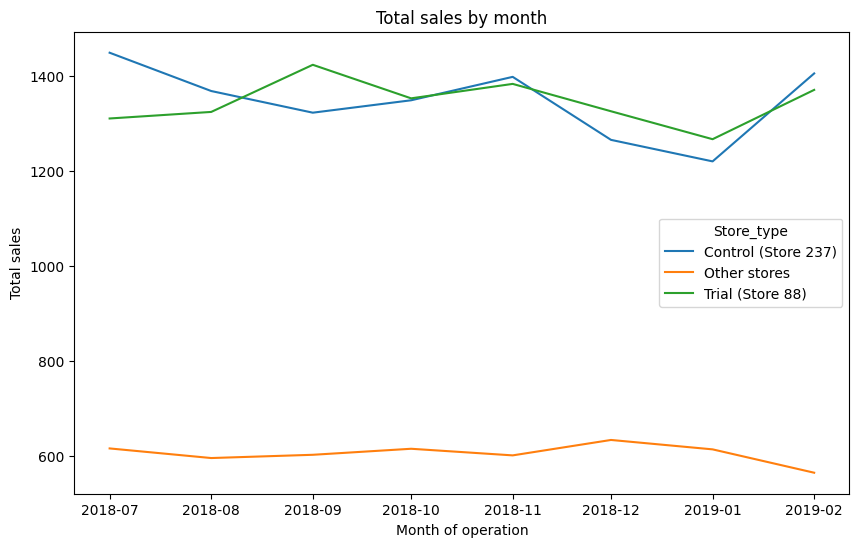

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the store_month_data for sales analysis
measureOverTimeSales = store_month_data.copy()

# Categorize stores into Trial, Control, and Other
measureOverTimeSales['Store_type'] = 'Other stores'
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, 'Store_type'] = f'Trial (Store {trial_store})'
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'Store_type'] = f'Control (Store {control_store})'

# Calculate the average total sales by month and store type for the pre-trial period
pastSales = measureOverTimeSales[measureOverTimeSales['MONTH_ID'] < '201903'].groupby(['MONTH_ID', 'Store_type'])['Total_Sales'].mean().reset_index()

# Convert MONTH_ID to datetime for plotting
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH_ID'], format='%Y%m')

# Plot the total sales by month for each store type
plt.figure(figsize=(10, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y='Total_Sales', hue='Store_type')
plt.title('Total sales by month')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.show()

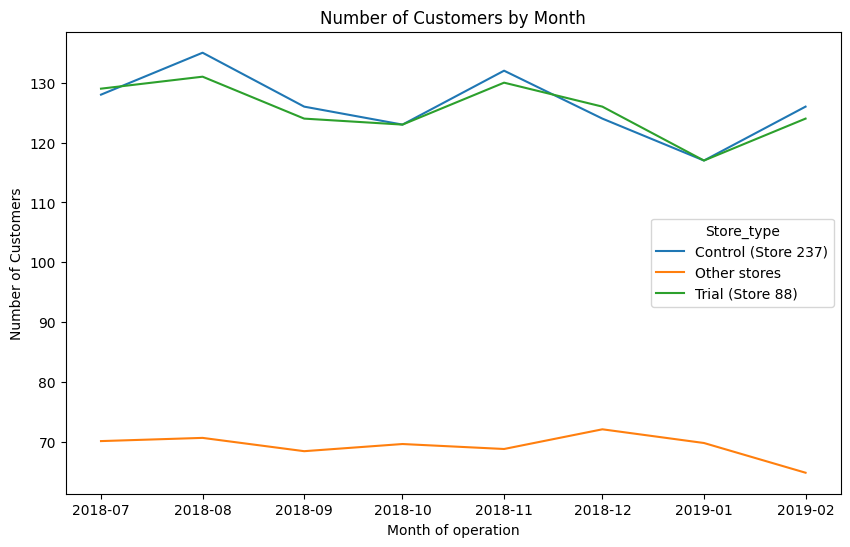

In [ ]:
# Create a copy of the store_month_data for customer analysis
measureOverTimeCusts = store_month_data.copy()

# Categorize stores into Trial, Control, and Other (using the same logic as for sales)
# Modify Store_type to include store number for Trial and Control stores
measureOverTimeCusts['Store_type'] = 'Other stores'
measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == trial_store, 'Store_type'] = f'Trial (Store {trial_store})'
measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store, 'Store_type'] = f'Control (Store {control_store})'


# Calculate the average number of customers by month and store type for the pre-trial period
pastCustomers = measureOverTimeCusts[measureOverTimeCusts['MONTH_ID'] < '201903'].groupby(['MONTH_ID', 'Store_type'])['Number_of_Customers'].mean().reset_index()

# Convert MONTH_ID to datetime for plotting
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH_ID'], format='%Y%m')

# Plot the number of customers by month for each store type
plt.figure(figsize=(10, 6))
sns.lineplot(data=pastCustomers, x='TransactionMonth', y='Number_of_Customers', hue='Store_type')
plt.title('Number of Customers by Month')
plt.xlabel('Month of operation')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# Create a copy of the store_month_data for sales analysis
measureOverTimeSales = store_month_data.copy()

# Filter for the pre-trial period
pre_trial_sales = measureOverTimeSales[measureOverTimeSales['MONTH_ID'] < '201902']

# Calculate the sum of pre-trial sales for the trial and control stores
trial_store_sales_sum = pre_trial_sales[pre_trial_sales['STORE_NBR'] == trial_store]['Total_Sales'].sum()
control_store_sales_sum = pre_trial_sales[pre_trial_sales['STORE_NBR'] == control_store]['Total_Sales'].sum()

# Calculate the scaling factor
scalingFactorForControlSales = trial_store_sales_sum / control_store_sales_sum

print(f"Scaling Factor for Control Sales: {scalingFactorForControlSales}")

# Apply the scaling factor to the control store's total sales
scaledControlSales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['Total_Sales'] * scalingFactorForControlSales

print("\n## Scaled Control Sales ##")
display(scaledControlSales.head())

Scaling Factor for Control Sales: 1.001558330664959

## Scaled Control Sales ##


,STORE_NBR,MONTH_ID,Total_Sales,Number_of_Customers,Number_of_Transactions,Total_Chips_Sold,Transactions_per_Customer,Chips_per_Customer,Average_Price_per_Unit,controlSales
2747,237,201807,1448.4,128,162,324,1.265625,2.531250,4.470370,1450.657086
2748,237,201808,1367.8,135,166,313,1.229630,2.318519,4.369968,1369.931485
2749,237,201809,1322.2,126,150,299,1.190476,2.373016,4.422074,1324.260425
2750,237,201810,1348.3,123,150,299,1.219512,2.430894,4.509365,1350.401097
2751,237,201811,1397.6,132,161,320,1.219697,2.424242,4.367500,1399.777923


In [ ]:
# Filter for trial store sales
trial_sales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store].copy()

# Merge scaled control sales with trial sales
percentageDiff = pd.merge(scaledControlSales, trial_sales, on='MONTH_ID', suffixes=('_control', '_trial'))

# Calculate the percentage difference
percentageDiff['percentageDiff'] = (percentageDiff['Total_Sales_trial'] - percentageDiff['controlSales']) / percentageDiff['controlSales']

print("## Percentage Difference between Scaled Control Sales and Trial Sales ##")
display(percentageDiff.head())

## Percentage Difference between Scaled Control Sales and Trial Sales ##


,STORE_NBR_control,MONTH_ID,Total_Sales_control,Number_of_Customers_control,Number_of_Transactions_control,Total_Chips_Sold_control,Transactions_per_Customer_control,Chips_per_Customer_control,Average_Price_per_Unit_control,controlSales,STORE_NBR_trial,Total_Sales_trial,Number_of_Customers_trial,Number_of_Transactions_trial,Total_Chips_Sold_trial,Transactions_per_Customer_trial,Chips_per_Customer_trial,Average_Price_per_Unit_trial,percentageDiff
0,237,201807,1448.4,128,162,324,1.265625,2.531250,4.470370,1450.657086,88,1310.0,129,153,306,1.186047,2.372093,4.281046,-0.096961
1,237,201808,1367.8,135,166,313,1.229630,2.318519,4.369968,1369.931485,88,1323.8,131,160,303,1.221374,2.312977,4.368977,-0.033674
2,237,201809,1322.2,126,150,299,1.190476,2.373016,4.422074,1324.260425,88,1423.0,124,159,318,1.282258,2.564516,4.474843,0.074562
3,237,201810,1348.3,123,150,299,1.219512,2.430894,4.509365,1350.401097,88,1352.4,123,158,316,1.284553,2.569106,4.279747,0.001480
4,237,201811,1397.6,132,161,320,1.219697,2.424242,4.367500,1399.777923,88,1382.8,130,157,314,1.207692,2.415385,4.403822,-0.012129


In [ ]:
from scipy.stats import t

# Calculate the standard deviation of the percentage difference in the pre-trial period
pre_trial_percentage_diff = percentageDiff[percentageDiff['MONTH_ID'] < '201902']['percentageDiff']
std_dev = pre_trial_percentage_diff.std()

# Calculate the degrees of freedom (number of pre-trial months - 1)
# Let's confirm the number of pre-trial months from the data
num_pre_trial_months = pre_trial_percentage_diff.shape[0]
degrees_of_freedom = num_pre_trial_months - 1 if num_pre_trial_months > 1 else 0

print(f"Standard Deviation of Pre-Trial Percentage Difference: {std_dev}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

# Calculate the t-value for each month in the trial period (from 201902 onwards)
# The null hypothesis is that the difference is 0.
# The test statistic is (observed difference - hypothesized difference) / standard error
# Standard error = standard deviation / sqrt(number of pre-trial months)
trial_percentage_diff = percentageDiff[percentageDiff['MONTH_ID'] >= '201902'].copy()

# Avoid division by zero if std_dev is 0 or num_pre_trial_months is 0
if std_dev > 0 and num_pre_trial_months > 0:
    standard_error = std_dev / np.sqrt(num_pre_trial_months)
    trial_percentage_diff['tValue'] = (trial_percentage_diff['percentageDiff'] - 0) / standard_error
else:
    trial_percentage_diff['tValue'] = np.nan # Cannot calculate t-value

# Find the 95th percentile of the t-distribution
# This is the critical t-value for a one-tailed test at alpha = 0.05
if degrees_of_freedom > 0:
    critical_t_value = t.ppf(0.95, degrees_of_freedom)
else:
    critical_t_value = np.nan # Cannot calculate critical t-value

print(f"Critical t-value (95th percentile): {critical_t_value}")

print("\n## T-values for Trial Months ##")
display(trial_percentage_diff[['MONTH_ID', 'percentageDiff', 'tValue']])


Standard Deviation of Pre-Trial Percentage Difference: 0.05724965451900225
Degrees of Freedom: 6
Critical t-value (95th percentile): 1.9431802805153022

## T-values for Trial Months ##


,MONTH_ID,percentageDiff,tValue
7,201902,-0.026147,-1.208384
8,201903,0.220743,10.201475
9,201904,0.193060,8.922142
10,201905,0.089147,4.119883
11,201906,0.172410,7.967811


In [ ]:
# Compare t-values to the critical t-value for statistical significance
print("## Statistical Significance of Sales Difference During Trial Period ##")

if not trial_percentage_diff.empty and not pd.isna(critical_t_value):
    for index, row in trial_percentage_diff.iterrows():
        month = row['MONTH_ID']
        t_value = row['tValue']

        if pd.isna(t_value):
            print(f"For month {month}: Cannot determine statistical significance as t-value is NaN.")
        elif abs(t_value) > critical_t_value:
            print(f"For month {month}: The sales difference is statistically significant (t-value = {t_value:.2f}, critical t-value = {critical_t_value:.2f}).")
        else:
            print(f"For month {month}: The sales difference is NOT statistically significant (t-value = {t_value:.2f}, critical t-value = {critical_t_value:.2f}).")
else:
    print("Cannot determine statistical significance. Please check the t-value calculations and the critical t-value.")

## Statistical Significance of Sales Difference During Trial Period ##
For month 201902: The sales difference is NOT statistically significant (t-value = -1.21, critical t-value = 1.94).
For month 201903: The sales difference is statistically significant (t-value = 10.20, critical t-value = 1.94).
For month 201904: The sales difference is statistically significant (t-value = 8.92, critical t-value = 1.94).
For month 201905: The sales difference is statistically significant (t-value = 4.12, critical t-value = 1.94).
For month 201906: The sales difference is statistically significant (t-value = 7.97, critical t-value = 1.94).


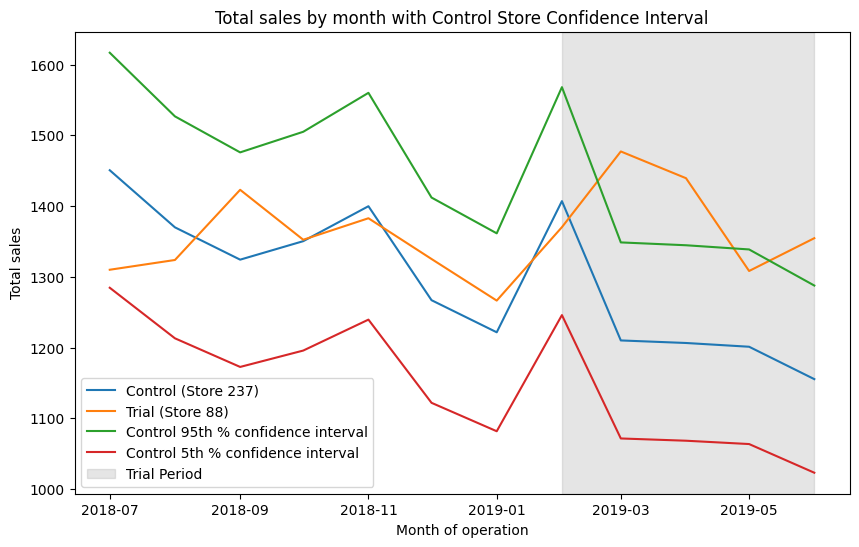

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse scaledControlSales from previous step
# Filter for trial store sales
trial_sales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store].copy()

# Add 'Store_type' column to trial and scaled control sales dataframes
trial_sales['Store_type'] = f'Trial (Store {trial_store})'
scaledControlSales['Store_type'] = f'Control (Store {control_store})'

# Calculate 95% confidence interval for scaled control sales
# Upper bound: scaledControlSales * (1 + stdDev * 2)
# Lower bound: scaledControlSales * (1 - stdDev * 2)
# Make copies to avoid SettingWithCopyWarning
pastSales_Controls95 = scaledControlSales.copy()
pastSales_Controls95['controlSales'] = pastSales_Controls95['controlSales'] * (1 + std_dev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

pastSales_Controls5 = scaledControlSales.copy()
pastSales_Controls5['controlSales'] = pastSales_Controls5['controlSales'] * (1 - std_dev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Prepare data for plotting
# Select relevant columns and rename 'controlSales' to 'Total_Sales' for concatenation
scaledControlSales_plot = scaledControlSales[['MONTH_ID', 'controlSales', 'Store_type']].rename(columns={'controlSales': 'Total_Sales'})
trial_sales_plot = trial_sales[['MONTH_ID', 'Total_Sales', 'Store_type']]
pastSales_Controls95_plot = pastSales_Controls95[['MONTH_ID', 'controlSales', 'Store_type']].rename(columns={'controlSales': 'Total_Sales'})
pastSales_Controls5_plot = pastSales_Controls5[['MONTH_ID', 'controlSales', 'Store_type']].rename(columns={'controlSales': 'Total_Sales'})


# Combine all dataframes
trialAssessment = pd.concat([scaledControlSales_plot, trial_sales_plot, pastSales_Controls95_plot, pastSales_Controls5_plot], ignore_index=True)

# Convert MONTH_ID to datetime for plotting
trialAssessment['TransactionMonth'] = pd.to_datetime(trialAssessment['MONTH_ID'], format='%Y%m')

# Plot the total sales with confidence intervals and trial period highlighted
plt.figure(figsize=(10, 6))
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='Total_Sales', hue='Store_type')

# Add shaded region for the trial period (February 2019 to June 2019)
# Define the start and end dates of the trial period
trial_start_date = pd.to_datetime('201902', format='%Y%m')
trial_end_date = pd.to_datetime('201906', format='%Y%m') # Assuming trial ends in June 2019

plt.axvspan(trial_start_date, trial_end_date, color='grey', alpha=0.2, label='Trial Period')


plt.title('Total sales by month with Control Store Confidence Interval')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.legend() # Show legend to include the trial period label
plt.show()

In [ ]:
# Filter for trial store customer counts
trial_customers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == trial_store].copy()

# Filter for the pre-trial period for customer counts
pre_trial_customers = measureOverTimeCusts[measureOverTimeCusts['MONTH_ID'] < '201902']

# Calculate the sum of pre-trial customers for the trial and control stores
trial_store_cust_sum = pre_trial_customers[pre_trial_customers['STORE_NBR'] == trial_store]['Number_of_Customers'].sum()
control_store_cust_sum = pre_trial_customers[pre_trial_customers['STORE_NBR'] == control_store]['Number_of_Customers'].sum()

# Avoid division by zero
if control_store_cust_sum == 0:
    print("Error: Control store pre-trial customer sum is zero. Cannot calculate scaling factor.")
    # You might want to handle this case differently, e.g., skip plotting or use a default scaling factor
else:
    # Calculate the scaling factor for customer counts
    scalingFactorForControlCust = trial_store_cust_sum / control_store_cust_sum

    print(f"Scaling Factor for Control Customers: {scalingFactorForControlCust}")

    # Apply the scaling factor to the control store's customer counts
    scaledControlCustomers = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'] == control_store].copy()
    scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Number_of_Customers'] * scalingFactorForControlCust

    print("\n## Scaled Control Customers ##")
    display(scaledControlCustomers.head())

    # Merge scaled control customers with trial customers
    percentageDiff_cust = pd.merge(scaledControlCustomers, trial_customers, on='MONTH_ID', suffixes=('_control', '_trial'))

    # Calculate the percentage difference for customer counts
    percentageDiff_cust['percentageDiff'] = (percentageDiff_cust['Number_of_Customers_trial'] - percentageDiff_cust['controlCustomers']) / percentageDiff_cust['controlCustomers']

    print("\n## Percentage Difference between Scaled Control Customers and Trial Customers ##")
    display(percentageDiff_cust.head())

Scaling Factor for Control Customers: 0.9943502824858758

## Scaled Control Customers ##


,STORE_NBR,MONTH_ID,Total_Sales,Number_of_Customers,Number_of_Transactions,Total_Chips_Sold,Transactions_per_Customer,Chips_per_Customer,Average_Price_per_Unit,Store_type,controlCustomers
2747,237,201807,1448.4,128,162,324,1.265625,2.531250,4.470370,Control (Store 237),127.276836
2748,237,201808,1367.8,135,166,313,1.229630,2.318519,4.369968,Control (Store 237),134.237288
2749,237,201809,1322.2,126,150,299,1.190476,2.373016,4.422074,Control (Store 237),125.288136
2750,237,201810,1348.3,123,150,299,1.219512,2.430894,4.509365,Control (Store 237),122.305085
2751,237,201811,1397.6,132,161,320,1.219697,2.424242,4.367500,Control (Store 237),131.254237



## Percentage Difference between Scaled Control Customers and Trial Customers ##


,STORE_NBR_control,MONTH_ID,Total_Sales_control,Number_of_Customers_control,Number_of_Transactions_control,Total_Chips_Sold_control,Transactions_per_Customer_control,Chips_per_Customer_control,Average_Price_per_Unit_control,Store_type_control,...,STORE_NBR_trial,Total_Sales_trial,Number_of_Customers_trial,Number_of_Transactions_trial,Total_Chips_Sold_trial,Transactions_per_Customer_trial,Chips_per_Customer_trial,Average_Price_per_Unit_trial,Store_type_trial,percentageDiff
0,237,201807,1448.4,128,162,324,1.265625,2.531250,4.470370,Control (Store 237),...,88,1310.0,129,153,306,1.186047,2.372093,4.281046,Trial (Store 88),0.013539
1,237,201808,1367.8,135,166,313,1.229630,2.318519,4.369968,Control (Store 237),...,88,1323.8,131,160,303,1.221374,2.312977,4.368977,Trial (Store 88),-0.024116
2,237,201809,1322.2,126,150,299,1.190476,2.373016,4.422074,Control (Store 237),...,88,1423.0,124,159,318,1.282258,2.564516,4.474843,Trial (Store 88),-0.010281
3,237,201810,1348.3,123,150,299,1.219512,2.430894,4.509365,Control (Store 237),...,88,1352.4,123,158,316,1.284553,2.569106,4.279747,Trial (Store 88),0.005682
4,237,201811,1397.6,132,161,320,1.219697,2.424242,4.367500,Control (Store 237),...,88,1382.8,130,157,314,1.207692,2.415385,4.403822,Trial (Store 88),-0.009556


Standard Deviation of Pre-Trial Percentage Difference (Customers): 0.015837873803830577


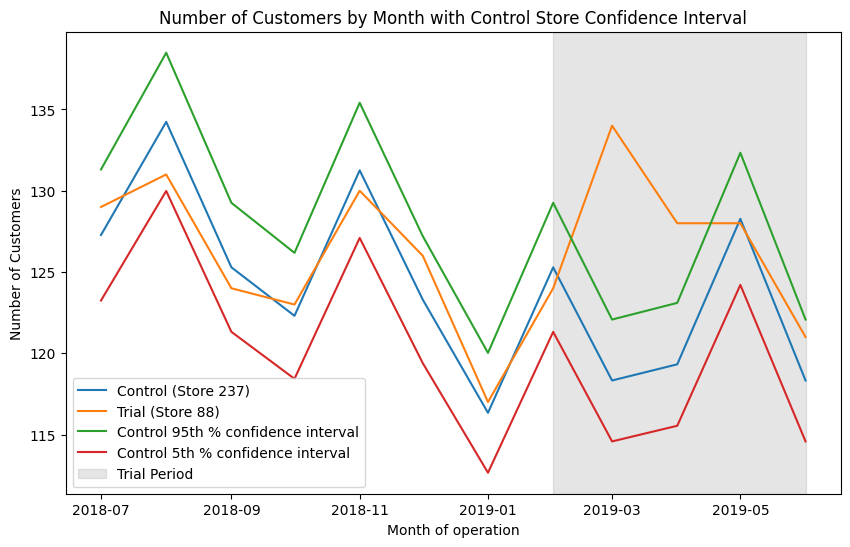

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t # Import t for critical value if needed later

# Calculate the standard deviation of the percentage difference in the pre-trial period for customers
pre_trial_percentage_diff_cust = percentageDiff_cust[percentageDiff_cust['MONTH_ID'] < '201902']['percentageDiff']
std_dev_cust = pre_trial_percentage_diff_cust.std()

print(f"Standard Deviation of Pre-Trial Percentage Difference (Customers): {std_dev_cust}")

# Reuse scaledControlCustomers and trial_customers from previous steps

# Add 'Store_type' column to trial and scaled control customer dataframes
trial_customers['Store_type'] = f'Trial (Store {trial_store})'
scaledControlCustomers['Store_type'] = f'Control (Store {control_store})'

# Calculate 95% confidence interval for scaled control customers
# Upper bound: scaledControlCustomers * (1 + stdDev_cust * 2)
# Lower bound: scaledControlCustomers * (1 - stdDev_cust * 2)
# Make copies to avoid SettingWithCopyWarning
pastCustomers_Controls95 = scaledControlCustomers.copy()
pastCustomers_Controls95['controlCustomers'] = pastCustomers_Controls95['controlCustomers'] * (1 + std_dev_cust * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

pastCustomers_Controls5 = scaledControlCustomers.copy()
pastCustomers_Controls5['controlCustomers'] = pastCustomers_Controls5['controlCustomers'] * (1 - std_dev_cust * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Prepare data for plotting
# Select relevant columns and rename 'controlCustomers' to 'Number_of_Customers' for concatenation
scaledControlCustomers_plot = scaledControlCustomers[['MONTH_ID', 'controlCustomers', 'Store_type']].rename(columns={'controlCustomers': 'Number_of_Customers'})
trial_customers_plot = trial_customers[['MONTH_ID', 'Number_of_Customers', 'Store_type']]
pastCustomers_Controls95_plot = pastCustomers_Controls95[['MONTH_ID', 'controlCustomers', 'Store_type']].rename(columns={'controlCustomers': 'Number_of_Customers'})
pastCustomers_Controls5_plot = pastCustomers_Controls5[['MONTH_ID', 'controlCustomers', 'Store_type']].rename(columns={'controlCustomers': 'Number_of_Customers'})


# Combine all dataframes
trialAssessment_cust = pd.concat([scaledControlCustomers_plot, trial_customers_plot, pastCustomers_Controls95_plot, pastCustomers_Controls5_plot], ignore_index=True)

# Convert MONTH_ID to datetime for plotting
trialAssessment_cust['TransactionMonth'] = pd.to_datetime(trialAssessment_cust['MONTH_ID'], format='%Y%m')

# Plot the number of customers with confidence intervals and trial period highlighted
plt.figure(figsize=(10, 6))
sns.lineplot(data=trialAssessment_cust, x='TransactionMonth', y='Number_of_Customers', hue='Store_type')

# Add shaded region for the trial period (February 2019 to June 2019)
# Define the start and end dates of the trial period (adjust if your trial period is different)
trial_start_date = pd.to_datetime('201902', format='%Y%m')
trial_end_date = pd.to_datetime('201906', format='%Y%m') # Assuming trial ends in June 2019

plt.axvspan(trial_start_date, trial_end_date, color='grey', alpha=0.2, label='Trial Period')

plt.title('Number of Customers by Month with Control Store Confidence Interval')
plt.xlabel('Month of operation')
plt.ylabel('Number of Customers')
plt.legend() # Show legend to include the trial period label
plt.show()